In [3]:
import numpy as np
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# IMPORTING THE CIFAR-10 DATASET

(50000, 32, 32, 3)
(50000,)
(10000, 32, 32, 3)
(10000,)


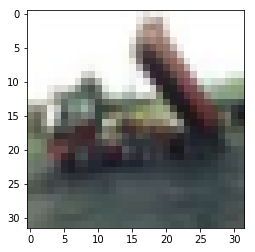

In [4]:
def unpickle(file):
 '''Load byte data from file'''
 with open(file, 'rb') as f:
  data = pickle.load(f, encoding='latin-1')
  return data


def load_cifar10_data(data_dir):
 '''Return train_data, train_labels, test_data, test_labels
 The shape of data is 32 x 32 x3'''
 train_data = None
 train_labels = []

 for i in range(1, 6):
  data_dic = unpickle(data_dir + "/data_batch_{}".format(i))
  if i == 1:
   train_data = data_dic['data']
  else:
   train_data = np.vstack((train_data, data_dic['data']))
  train_labels += data_dic['labels']

 test_data_dic = unpickle(data_dir + "/test_batch")
 test_data = test_data_dic['data']
 test_labels = test_data_dic['labels']

 train_data = train_data.reshape((len(train_data), 3, 32, 32))
 train_data = np.rollaxis(train_data, 1, 4)
 train_labels = np.array(train_labels)

 test_data = test_data.reshape((len(test_data), 3, 32, 32))
 test_data = np.rollaxis(test_data, 1, 4)
 test_labels = np.array(test_labels)

 return train_data, train_labels, test_data, test_labels

data_dir = 'cifar-10-batches-py'

train_data, train_labels, test_data, test_labels = load_cifar10_data(data_dir)

print(train_data.shape)
print(train_labels.shape)

print(test_data.shape)
print(test_labels.shape)

# In order to check where the data shows an image correctly
plt.imshow(train_data[2])
plt.show()

X_train_data = train_data
Y_train_labels = train_labels

X_test_data = test_data
Y_test_labels = test_labels

In [5]:
print(type(X_train_data), X_train_data)

<class 'numpy.ndarray'> [[[[ 59  62  63]
   [ 43  46  45]
   [ 50  48  43]
   ...
   [158 132 108]
   [152 125 102]
   [148 124 103]]

  [[ 16  20  20]
   [  0   0   0]
   [ 18   8   0]
   ...
   [123  88  55]
   [119  83  50]
   [122  87  57]]

  [[ 25  24  21]
   [ 16   7   0]
   [ 49  27   8]
   ...
   [118  84  50]
   [120  84  50]
   [109  73  42]]

  ...

  [[208 170  96]
   [201 153  34]
   [198 161  26]
   ...
   [160 133  70]
   [ 56  31   7]
   [ 53  34  20]]

  [[180 139  96]
   [173 123  42]
   [186 144  30]
   ...
   [184 148  94]
   [ 97  62  34]
   [ 83  53  34]]

  [[177 144 116]
   [168 129  94]
   [179 142  87]
   ...
   [216 184 140]
   [151 118  84]
   [123  92  72]]]


 [[[154 177 187]
   [126 137 136]
   [105 104  95]
   ...
   [ 91  95  71]
   [ 87  90  71]
   [ 79  81  70]]

  [[140 160 169]
   [145 153 154]
   [125 125 118]
   ...
   [ 96  99  78]
   [ 77  80  62]
   [ 71  73  61]]

  [[140 155 164]
   [139 146 149]
   [115 115 112]
   ...
   [ 79  82  64]
   [

In [6]:
print(type(test_data), test_data)

<class 'numpy.ndarray'> [[[[158 112  49]
   [159 111  47]
   [165 116  51]
   ...
   [137  95  36]
   [126  91  36]
   [116  85  33]]

  [[152 112  51]
   [151 110  40]
   [159 114  45]
   ...
   [136  95  31]
   [125  91  32]
   [119  88  34]]

  [[151 110  47]
   [151 109  33]
   [158 111  36]
   ...
   [139  98  34]
   [130  95  34]
   [120  89  33]]

  ...

  [[ 68 124 177]
   [ 42 100 148]
   [ 31  88 137]
   ...
   [ 38  97 146]
   [ 13  64 108]
   [ 40  85 127]]

  [[ 61 116 168]
   [ 49 102 148]
   [ 35  85 132]
   ...
   [ 26  82 130]
   [ 29  82 126]
   [ 20  64 107]]

  [[ 54 107 160]
   [ 56 105 149]
   [ 45  89 132]
   ...
   [ 24  77 124]
   [ 34  84 129]
   [ 21  67 110]]]


 [[[235 235 235]
   [231 231 231]
   [232 232 232]
   ...
   [233 233 233]
   [233 233 233]
   [232 232 232]]

  [[238 238 238]
   [235 235 235]
   [235 235 235]
   ...
   [236 236 236]
   [236 236 236]
   [235 235 235]]

  [[237 237 237]
   [234 234 234]
   [234 234 234]
   ...
   [235 235 235]
   [

In [7]:
print('X_train_data', type(X_train_data), X_train_data.shape)

X_train_data <class 'numpy.ndarray'> (50000, 32, 32, 3)


In [8]:
print('Y_train_labels', type(Y_train_labels), Y_train_labels.shape)

Y_train_labels <class 'numpy.ndarray'> (50000,)


In [9]:
print('test_data', type(test_data), test_data.shape)

test_data <class 'numpy.ndarray'> (10000, 32, 32, 3)


In [10]:
print('test_labels', type(test_labels), test_labels.shape)

test_labels <class 'numpy.ndarray'> (10000,)


In [11]:
print(type(Y_train_labels), Y_train_labels)

<class 'numpy.ndarray'> [6 9 9 ... 9 1 1]


# CHECKING THE DISTRIBUTION OF THE TRAIN AND TEST DATA

In [12]:
class_train, counts_train = np.unique(Y_train_labels, return_counts = True)

distribution_train = dict(zip(class_train, counts_train))
print(distribution_train )

{0: 5000, 1: 5000, 2: 5000, 3: 5000, 4: 5000, 5: 5000, 6: 5000, 7: 5000, 8: 5000, 9: 5000}


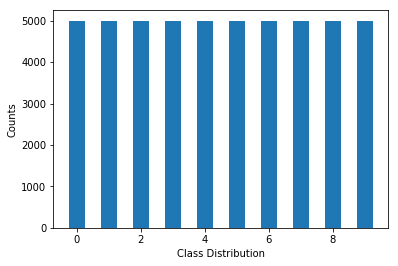

In [13]:
plt.bar(list(distribution_train.keys()),distribution_train.values(),width =0.5)
plt.xlabel('Class Distribution')
plt.ylabel('Counts')
plt.show()

In [14]:
class_test, counts_test = np.unique(Y_test_labels, return_counts = True)

distribution_test = dict(zip(class_test, counts_test))
print(distribution_test)

{0: 1000, 1: 1000, 2: 1000, 3: 1000, 4: 1000, 5: 1000, 6: 1000, 7: 1000, 8: 1000, 9: 1000}


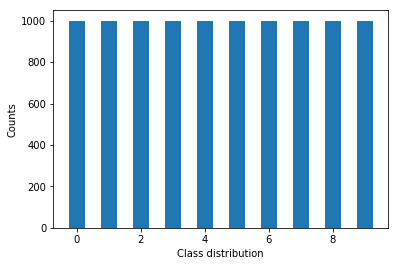

In [15]:
plt.bar(list(distribution_test.keys()),distribution_test.values(),width =0.5)
plt.xlabel('Class distribution')
plt.ylabel('Counts')
plt.show()

In [17]:
X_train_unshuf_unscaled = X_train_data
X_test = test_data
X_train_data.shape

(50000, 32, 32, 3)

# RESHAPING THE DATA

In [18]:
X_train_unshuf_reshaped_unscaled=X_train_unshuf_unscaled.reshape(50000,32*3*32)
X_test_reshaped = X_test.reshape(10000,3072)
print(X_train_unshuf_reshaped_unscaled.shape)
X_test_reshaped.shape

(50000, 3072)


(10000, 3072)

# SPLITTING THE DATA

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val  = train_test_split(X_train_unshuf_reshaped_unscaled, Y_train_labels, test_size = 1/10, random_state = 42)

In [20]:
X_train.shape

(45000, 3072)

In [21]:
X_val.shape

(5000, 3072)

In [22]:
y_train.shape

(45000,)

In [23]:
y_val.shape

(5000,)

# SCALING THE DATA

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train.astype(np.float32))

In [25]:
X_val_s = scaler.fit_transform(X_val.astype(np.float32))

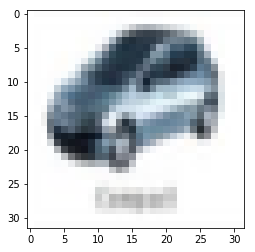

In [26]:
plt.imshow(X_train[1].reshape(32,32,3), interpolation = 'nearest') #plt.axis("off")
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


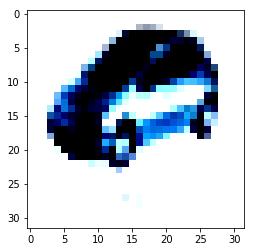

In [27]:
plt.imshow(X_train_s[1].reshape(32,32,3), interpolation = 'nearest')
plt.show()

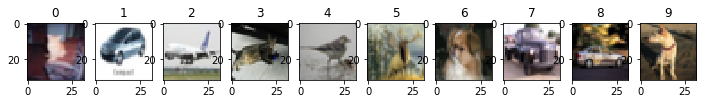

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

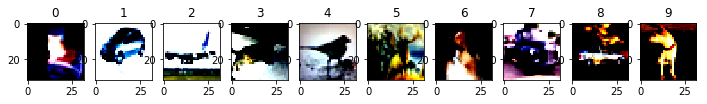

In [36]:
fig_object, ax_object = plt.subplots(1, 10, figsize=(12,5))
ax_object = ax_object.reshape(10,)
      
for i in range(len(ax_object)):
    ax = ax_object[i]
    ax.imshow(X_train[i].reshape(32,32,3), interpolation = 'nearest')
    ax.set_title(i)       
plt.show()

fig_object, ax_object = plt.subplots(1, 10, figsize=(12,5))
ax_object = ax_object.reshape(10,)
      
for i in range(len(ax_object)):
    ax = ax_object[i]
    ax.imshow(X_train_s[i].reshape(32,32,3), interpolation = 'nearest')
    ax.set_title(i)       
plt.show()

In [29]:
import tensorflow as tf

C:\Users\parva\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [30]:
from sklearn.metrics import accuracy_score

# Performace of Unscaled [just for comparison]

In [239]:
#learning curve

Nron_size_list_Unsc = [500]

config = tf.contrib.learn.RunConfig(tf_random_seed=42) 
feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train)
    
dnn_1_clf = tf.contrib.learn.DNNClassifier(activation_fn=tf.nn.relu, hidden_units=[500], n_classes=10, feature_columns=feature_columns, config=config)
dnn_1_clf = tf.contrib.learn.SKCompat(dnn_1_clf) #### to be compatible with sklearn
    

from datetime import datetime
start=datetime.now()
dnn_1_clf.fit(X_train_s, y_train, batch_size=200, steps=(1100))
Train_elapse = (datetime.now()-start).total_seconds()
print('dnn_1_clf training time', Train_elapse)
Train_time_list_1ep.append(Train_elapse)
    
y_train_pred = dnn_1_clf.predict(X_train) #return dictionary
Train_error = 1 - accuracy_score(y_train, y_train_pred['classes'])

    
print(type(y_train_pred))

start=datetime.now()
y_val_pred =  dnn_1_clf.predict(X_val)
    
Val_elapse = (datetime.now()-start).total_seconds()

Val_time_list_1ep.append(Val_elapse)
Val_error = 1 - accuracy_score(y_val, y_val_pred['classes'])
      
    
print('Train error, Val_error',  Train_error, '/', Val_error)
                                   
accuracy = accuracy_score(y_val, y_val_pred['classes'])
    
print("Nron_size_list_Unsc: ", Nron_size_list_Unsc)
print('Val_error', Val_error)
print('Train_error', Train_error)
print('Val_accuracy', accuracy)


INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002008BE99BA8>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\parva\\AppData\\Local\\Temp\\tmpy4nostgz'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\parva\AppDa

In [248]:
Nron_size_list_Unsc_s = [500]

config = tf.contrib.learn.RunConfig(tf_random_seed=42) 
feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train_s)
    
dnn_1_clf = tf.contrib.learn.DNNClassifier(activation_fn=tf.nn.relu, hidden_units=[500], n_classes=10, feature_columns=feature_columns, config=config)
dnn_1_clf = tf.contrib.learn.SKCompat(dnn_1_clf) #### to be compatible with sklearn
    

from datetime import datetime
start=datetime.now()
dnn_1_clf.fit(X_train_s, y_train, batch_size=200, steps=(1100))
Train_elapse = (datetime.now()-start).total_seconds()
print('dnn_1_clf training time', Train_elapse)
Train_time_list_1ep.append(Train_elapse)
    
y_train_pred = dnn_1_clf.predict(X_train_s)
                                 
Train_error_s = 1 - accuracy_score(y_train, y_train_pred['classes'])

    
print(type(y_train_pred))

start=datetime.now()
y_val_pred =  dnn_1_clf.predict(X_val_s)
    
Val_elapse_s = (datetime.now()-start).total_seconds()

Val_time_list_1ep.append(Val_elapse)
Val_error_s = 1 - accuracy_score(y_val, y_val_pred['classes'])
      
    
print('Train error_s, Val_error_s',  Train_error_s, '/', Val_error_s)
                                   
accuracy_s = accuracy_score(y_val, y_val_pred['classes'])
    
print("Nron_size_list_Unsc_s: ", Nron_size_list_Unsc_s)
print('Val_error_s', Val_error_s)
print('Train_error_s', Train_error_s)
print('Val_accuracy_s', accuracy_s)


INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002008CD7FDD8>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\parva\\AppData\\Local\\Temp\\tmpgzdhr2qe'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\parva\AppDa

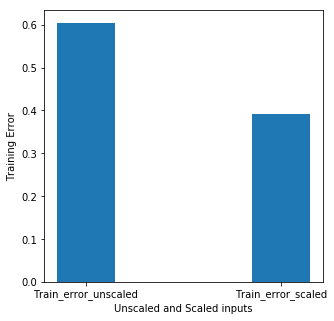

In [266]:
import pylab as plt

Order = [1, 2]
Values = [0.604, 0.392]

LABELS = ["Train_error_unscaled", "Train_error_scaled"]
plt.figure(figsize = (5,5))
plt.bar(Order, Values, align='center', width=0.3)
plt.xticks(Order, LABELS)
plt.xlabel('Unscaled and Scaled inputs')
plt.ylabel('Training Error')
plt.show()

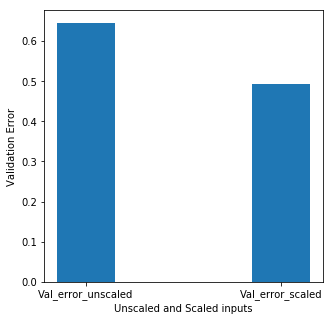

In [267]:

Order = [1, 2]
Values = [0.644, 0.492]

LABELS = ["Val_error_unscaled", "Val_error_scaled"]
plt.figure(figsize = (5,5))
plt.bar(Order, Values, align='center', width=0.3)
plt.xticks(Order, LABELS)
plt.xlabel('Unscaled and Scaled inputs')
plt.ylabel('Validation Error')
plt.show()

# Using Scaled from here onwards

# Observation of changing training set size for different epochs

In [270]:
#learning curve

Train_size_list_1ep = []
Train_error_list_1ep = []
Val_error_list_1ep = []
Train_time_list_1ep = []
Val_time_list_1ep = []

from sklearn.model_selection import train_test_split

for j in [ 0.999, 0.995, 0.99,0.985,0.98, 0.975,0.97, 0.96,0.95, 0.94, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.2, 0.1, 0.001, 0]:

    X_train_scaled_partial, X_noneed, y_train_partial, y_noneed  = train_test_split(X_train_s, y_train, test_size = j, random_state = 42)
    print('Train_set_size:', y_train_partial.shape[0])
    Train_size_list_1ep.append(y_train_partial.shape[0])
    
    
    config = tf.contrib.learn.RunConfig(tf_random_seed=42) 
    feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train_scaled_partial)
    
    dnn_1_clf = tf.contrib.learn.DNNClassifier(hidden_units=[500], n_classes=10, feature_columns=feature_columns, config=config)
    dnn_1_clf = tf.contrib.learn.SKCompat(dnn_1_clf) #### to be compatible with sklearn
    
    
    start=datetime.now()
    dnn_1_clf.fit(X_train_scaled_partial, y_train_partial, batch_size=50, steps=((1-j)*1100) )
    Train_elapse = (datetime.now()-start).total_seconds()
    print('dnn_1_clf training time', Train_elapse)
    Train_time_list_1ep.append(Train_elapse)
    
    y_train_partial_pred = dnn_1_clf.predict(X_train_scaled_partial) #return dictionary
    Train_error = 1 - accuracy_score(y_train_partial, y_train_partial_pred['classes'])

    
    print(type(y_train_partial_pred))
    
    

   
    start=datetime.now()
    y_val_pred =  dnn_1_clf.predict(X_val_s)
    
    Val_elapse = (datetime.now()-start).total_seconds()
    
    Val_time_list_1ep.append(Val_elapse)
    
    Val_error = 1 - accuracy_score(y_val, y_val_pred['classes'])
      
    
    print('Train error, Val_error',  Train_error, '/', Val_error)
                                   
    Train_error_list_1ep.append(Train_error)
    Val_error_list_1ep.append(Val_error)
    
print("Train_size_list: ", Train_size_list_1ep)
print("Train_error_list: ", Train_error_list_1ep)
print("Val_error_list: ", Val_error_list_1ep)
print("Train_time_list: ", Train_time_list_1ep)
print("Val_time_list: ", Val_time_list_1ep)

Train_set_size: 45
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002008F520978>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\parva\\AppData\\Local\\Temp\\tmp32rm13m9'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\parva\AppData\Local\Temp\tmp7mrx4gd1\model.ckpt.
INFO:tensorflow:loss = 2.8193903, step = 1
INFO:tensorflow:Saving checkpoints for 23 into C:\Users\parva\AppData\Local\Temp\tmp7mrx4gd1\model.ckpt.
INFO:tensorflow:Loss for final step: 3.4107876.
dnn_1_clf training time 3.590432
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\parva\AppData\Local\Temp\tmp7mrx4gd1\model.ckpt-23
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
<class 'dict'>
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\parva\AppData\Local\Temp\tmp7mrx4gd1\model.ckpt-23
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.5855555555555556 / 

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
<class 'dict'>
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\parva\AppData\Local\Temp\tmp8n8ho45z\model.ckpt-56
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.548 / 0.6861999999999999
Train_set_size: 2700
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002009D449E80>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_ch

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
<class 'dict'>
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\parva\AppData\Local\Temp\tmp6ez0opms\model.ckpt-331
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.5637777777777777 / 0.6186
Train_set_size: 18000
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002008E0D1B00>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\parva\AppData\Local\Temp\tmp1rsnur6d\model.ckpt.
INFO:tensorflow:loss = 3.2621799, step = 1
INFO:tensorflow:global_step/sec: 56.0725
INFO:tensorflow:loss = 1.8215665, step = 101 (1.789 sec)
INFO:tensorflow:global_step/sec: 58.909
INFO:tensorflow:loss = 2.2211547, step = 201 (1.692 sec)
INFO:tensorflow:global_step/sec: 55.9372
INFO:tensorflow:loss = 1.4753671, step = 301 (1.790 sec)
INFO:tensorflow:global_step/sec: 58.1409
INFO:tensorflow:loss = 1.7478981, step = 401 (1.717 sec)
INFO:tensorflow:global_step/sec: 58.3788
INFO:tensorflow:loss = 1.728646, step = 501 (1.717 sec)
INFO:tensorflow:global_step/sec: 57.7448
INFO:tensorflow:loss = 1.5224663, step = 601 (1.729 sec)
INFO:tensorflow:global_step/sec: 56.1987
INFO:tensorflow:loss = 1.6816717, step = 701 (1.778 sec)
INFO:

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\parva\AppData\Local\Temp\tmp95mvgm8e\model.ckpt.
INFO:tensorflow:loss = 2.739051, step = 1
INFO:tensorflow:global_step/sec: 52.1392
INFO:tensorflow:loss = 1.50239, step = 101 (1.906 sec)
INFO:tensorflow:global_step/sec: 52.3613
INFO:tensorflow:loss = 1.7671897, step = 201 (1.908 sec)
INFO:tensorflow:global_step/sec: 53.3425
INFO:tensorflow:loss = 1.745406, step = 301 (1.876 sec)
INFO:tensorflow:global_step/sec: 50.9072
INFO:tensorflow:loss = 1.6337491, step = 401 (1.966 sec)
INFO:tensorflow:global_step/sec: 55.7739
INFO:tensorflow:loss = 1.5695753, step = 501 (1.796 sec)
INFO:tensorflow:global_step/sec: 53.6608
INFO:tensorflow:loss = 2.0080857, step = 601 (1.859 sec)
INFO:tensorflow:global_step/sec: 55.1426
INFO:tensorflow:loss = 1.5784372, step = 701 (1.810 sec)
INFO:te

In [272]:
#learning curve

Train_size_list_5ep = []
Train_error_list_5ep = []
Val_error_list_5ep = []
Train_time_list_5ep = []
Val_time_list_5ep = []

from sklearn.model_selection import train_test_split

for j in [ 0.999, 0.995, 0.99,0.985,0.98, 0.975,0.97, 0.96,0.95, 0.94, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.2, 0.1, 0.001, 0]:

    X_train_scaled_partial, X_noneed, y_train_partial, y_noneed  = train_test_split(X_train_s, y_train, test_size = j, random_state = 42)
    print('Train_set_size:', y_train_partial.shape[0])
    Train_size_list_5ep.append(y_train_partial.shape[0])
    
    
    config = tf.contrib.learn.RunConfig(tf_random_seed=42) 
    feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train_scaled_partial)
    
    dnn_1_clf = tf.contrib.learn.DNNClassifier(hidden_units=[500], n_classes=10, feature_columns=feature_columns, config=config)
    dnn_1_clf = tf.contrib.learn.SKCompat(dnn_1_clf) #### to be compatible with sklearn
    
    
    start=datetime.now()
    dnn_1_clf.fit(X_train_scaled_partial, y_train_partial, batch_size=50, steps=((1-j)*1100*5) )
    Train_elapse = (datetime.now()-start).total_seconds()
    print('dnn_1_clf training time', Train_elapse)
    Train_time_list_5ep.append(Train_elapse)
    
    y_train_partial_pred = dnn_1_clf.predict(X_train_scaled_partial) #return dictionary
    Train_error = 1 - accuracy_score(y_train_partial, y_train_partial_pred['classes'])

    
    print(type(y_train_partial_pred))
    
    

   
    start=datetime.now()
    y_val_pred =  dnn_1_clf.predict(X_val_s)
    
    Val_elapse = (datetime.now()-start).total_seconds()
    
    Val_time_list_5ep.append(Val_elapse)
    
    Val_error = 1 - accuracy_score(y_val, y_val_pred['classes'])
      
    
    print('Train error, Val_error',  Train_error, '/', Val_error)
                                   
    Train_error_list_5ep.append(Train_error)
    Val_error_list_5ep.append(Val_error)
    
print("Train_size_list: ", Train_size_list_5ep)
print("Train_error_list: ", Train_error_list_5ep)
print("Val_error_list: ", Val_error_list_5ep)
print("Train_time_list: ", Train_time_list_5ep)
print("Val_time_list: ", Val_time_list_5ep)

Train_set_size: 45
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002008CA5E438>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\parva\\AppData\\Local\\Temp\\tmpng0veym_'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\parva\AppData\Local\Temp\tmp9yfs962o\model.ckpt.
INFO:tensorflow:loss = 2.8193903, step = 1
INFO:tensorflow:global_step/sec: 58.0054
INFO:tensorflow:loss = 0.5133932, step = 101 (1.728 sec)
INFO:tensorflow:Saving checkpoints for 111 into C:\Users\parva\AppData\Local\Temp\tmp9yfs962o\model.ckpt.
INFO:tensorflow:Loss for final step: 0.4033969.
dnn_1_clf training time 6.42505
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\parva\AppData\Local\Temp\tmp9yfs962o\model.ckpt-111
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
<class 'dict'>
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\parva\AppData\Local\Temp\tmp9yfs962o\model.ckpt-111
INFO:tensorflow:Running loc

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\parva\AppData\Local\Temp\tmp1uxwbwv4\model.ckpt.
INFO:tensorflow:loss = 2.3909152, step = 1
INFO:tensorflow:global_step/sec: 56.7552
INFO:tensorflow:loss = 1.292225, step = 101 (1.770 sec)
INFO:tensorflow:global_step/sec: 57.9838
INFO:tensorflow:loss = 1.0032369, step = 201 (1.720 sec)
INFO:tensorflow:Saving checkpoints for 276 into C:\Users\parva\AppData\Local\Temp\tmp1uxwbwv4\model.ckpt.
INFO:tensorflow:Loss for final step: 1.0376565.
dnn_1_clf training time 7.723782
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\parva\AppData\Local\Temp\tmp1uxwbwv4\model.ckpt-276
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
<class 'dict'>
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\parva\AppData\Local\Temp\tmp1uxwbwv4\model.ckpt-276
INFO:tenso

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
<class 'dict'>
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\parva\AppData\Local\Temp\tmphdc7aa5i\model.ckpt-1100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.28966666666666663 / 0.5616
Train_set_size: 13500
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002009D04F2B0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_sa

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\parva\AppData\Local\Temp\tmppwp7dhor\model.ckpt.
INFO:tensorflow:loss = 2.7545428, step = 1
INFO:tensorflow:global_step/sec: 55.1124
INFO:tensorflow:loss = 1.9136795, step = 101 (1.818 sec)
INFO:tensorflow:global_step/sec: 54.3362
INFO:tensorflow:loss = 1.4279585, step = 201 (1.840 sec)
INFO:tensorflow:global_step/sec: 56.248
INFO:tensorflow:loss = 1.8432174, step = 301 (1.779 sec)
INFO:tensorflow:global_step/sec: 55.7562
INFO:tensorflow:loss = 1.5877686, step = 401 (1.803 sec)
INFO:tensorflow:global_step/sec: 56.2647
INFO:tensorflow:loss = 1.135893, step = 501 (1.764 sec)
INFO:tensorflow:global_step/sec: 55.479
INFO:tensorflow:loss = 1.569775, step = 601 (1.806 sec)
INFO:tensorflow:global_step/sec: 55.2257
INFO:tensorflow:loss = 1.4568353, step = 701 (1.821 sec)
INFO:te

dnn_1_clf training time 64.967676
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\parva\AppData\Local\Temp\tmpmupqpeh0\model.ckpt-3300
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
<class 'dict'>
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\parva\AppData\Local\Temp\tmpmupqpeh0\model.ckpt-3300
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.35185185185185186 / 0.5227999999999999
Train_set_size: 36000
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002009CED9D30>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gp

INFO:tensorflow:global_step/sec: 57.3143
INFO:tensorflow:loss = 1.391893, step = 401 (1.745 sec)
INFO:tensorflow:global_step/sec: 56.5428
INFO:tensorflow:loss = 1.6931118, step = 501 (1.772 sec)
INFO:tensorflow:global_step/sec: 57.3037
INFO:tensorflow:loss = 1.7406675, step = 601 (1.746 sec)
INFO:tensorflow:global_step/sec: 57.005
INFO:tensorflow:loss = 1.4624565, step = 701 (1.766 sec)
INFO:tensorflow:global_step/sec: 57.0152
INFO:tensorflow:loss = 1.6767616, step = 801 (1.739 sec)
INFO:tensorflow:global_step/sec: 56.1756
INFO:tensorflow:loss = 1.6908547, step = 901 (1.779 sec)
INFO:tensorflow:global_step/sec: 56.4977
INFO:tensorflow:loss = 1.447679, step = 1001 (1.770 sec)
INFO:tensorflow:global_step/sec: 57.1128
INFO:tensorflow:loss = 1.9468695, step = 1101 (1.767 sec)
INFO:tensorflow:global_step/sec: 55.8377
INFO:tensorflow:loss = 1.6398513, step = 1201 (1.778 sec)
INFO:tensorflow:global_step/sec: 56.4587
INFO:tensorflow:loss = 1.7076627, step = 1301 (1.775 sec)
INFO:tensorflow:glo

INFO:tensorflow:global_step/sec: 55.806
INFO:tensorflow:loss = 1.4583222, step = 1901 (1.792 sec)
INFO:tensorflow:global_step/sec: 56.3244
INFO:tensorflow:loss = 1.3001316, step = 2001 (1.775 sec)
INFO:tensorflow:global_step/sec: 56.3368
INFO:tensorflow:loss = 1.2668225, step = 2101 (1.777 sec)
INFO:tensorflow:global_step/sec: 57.4276
INFO:tensorflow:loss = 1.4357225, step = 2201 (1.755 sec)
INFO:tensorflow:global_step/sec: 56.538
INFO:tensorflow:loss = 1.3724267, step = 2301 (1.753 sec)
INFO:tensorflow:global_step/sec: 57.0711
INFO:tensorflow:loss = 1.1324437, step = 2401 (1.752 sec)
INFO:tensorflow:global_step/sec: 56.476
INFO:tensorflow:loss = 1.6214731, step = 2501 (1.771 sec)
INFO:tensorflow:global_step/sec: 55.1608
INFO:tensorflow:loss = 1.0740314, step = 2601 (1.814 sec)
INFO:tensorflow:global_step/sec: 56.6192
INFO:tensorflow:loss = 1.7354969, step = 2701 (1.765 sec)
INFO:tensorflow:global_step/sec: 56.0954
INFO:tensorflow:loss = 1.2261304, step = 2801 (1.798 sec)
INFO:tensorfl

INFO:tensorflow:global_step/sec: 55.8112
INFO:tensorflow:loss = 1.2618585, step = 2901 (1.794 sec)
INFO:tensorflow:global_step/sec: 56.3196
INFO:tensorflow:loss = 1.2414345, step = 3001 (1.769 sec)
INFO:tensorflow:global_step/sec: 55.9938
INFO:tensorflow:loss = 1.4680114, step = 3101 (1.804 sec)
INFO:tensorflow:global_step/sec: 54.7578
INFO:tensorflow:loss = 1.1717296, step = 3201 (1.812 sec)
INFO:tensorflow:global_step/sec: 56.2893
INFO:tensorflow:loss = 1.6829257, step = 3301 (1.774 sec)
INFO:tensorflow:global_step/sec: 55.8139
INFO:tensorflow:loss = 1.4241263, step = 3401 (1.794 sec)
INFO:tensorflow:global_step/sec: 59.103
INFO:tensorflow:loss = 0.99683577, step = 3501 (1.693 sec)
INFO:tensorflow:global_step/sec: 54.3617
INFO:tensorflow:loss = 1.2382573, step = 3601 (1.843 sec)
INFO:tensorflow:global_step/sec: 51.3127
INFO:tensorflow:loss = 1.1820182, step = 3701 (1.946 sec)
INFO:tensorflow:global_step/sec: 53.4005
INFO:tensorflow:loss = 1.10767, step = 3801 (1.873 sec)
INFO:tensorf

In [273]:
#learning curve

Train_size_list_10ep = []
Train_error_list_10ep = []
Val_error_list_10ep = []
Train_time_list_10ep = []
Val_time_list_10ep = []

from sklearn.model_selection import train_test_split

for j in [ 0.999, 0.995, 0.99,0.985,0.98, 0.975,0.97, 0.96,0.95, 0.94, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.2, 0.1, 0.001, 0]:

    X_train_scaled_partial, X_noneed, y_train_partial, y_noneed  = train_test_split(X_train_s, y_train, test_size = j, random_state = 42)
    print('Train_set_size:', y_train_partial.shape[0])
    Train_size_list_10ep.append(y_train_partial.shape[0])
    
    
    config = tf.contrib.learn.RunConfig(tf_random_seed=42) 
    feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train_scaled_partial)
    
    dnn_1_clf = tf.contrib.learn.DNNClassifier(hidden_units=[500], n_classes=10, feature_columns=feature_columns, config=config)
    dnn_1_clf = tf.contrib.learn.SKCompat(dnn_1_clf) #### to be compatible with sklearn
    
    
    start=datetime.now()
    dnn_1_clf.fit(X_train_scaled_partial, y_train_partial, batch_size=50, steps=((1-j)*1100*10) )
    Train_elapse = (datetime.now()-start).total_seconds()
    print('dnn_1_clf training time', Train_elapse)
    Train_time_list_10ep.append(Train_elapse)
    
    y_train_partial_pred = dnn_1_clf.predict(X_train_scaled_partial) #return dictionary
    Train_error = 1 - accuracy_score(y_train_partial, y_train_partial_pred['classes'])

    
    print(type(y_train_partial_pred))
    
    

   
    start=datetime.now()
    y_val_pred =  dnn_1_clf.predict(X_val_s)
    
    Val_elapse = (datetime.now()-start).total_seconds()
    
    Val_time_list_10ep.append(Val_elapse)
    
    Val_error = 1 - accuracy_score(y_val, y_val_pred['classes'])
      
    
    print('Train error, Val_error',  Train_error, '/', Val_error)
                                   
    Train_error_list_10ep.append(Train_error)
    Val_error_list_10ep.append(Val_error)
    
print("Train_size_list: ", Train_size_list_10ep)
print("Train_error_list: ", Train_error_list_10ep)
print("Val_error_list: ", Val_error_list_10ep)
print("Train_time_list: ", Train_time_list_10ep)
print("Val_time_list: ", Val_time_list_10ep)

Train_set_size: 45
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000020091432C88>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\parva\\AppData\\Local\\Temp\\tmpq9ravok2'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\parva\AppData\Local\Temp\tmpogw9btsp\model.ckpt.
INFO:tensorflow:loss = 2.8193903, step = 1
INFO:tensorflow:global_step/sec: 58.8573
INFO:tensorflow:loss = 0.5133932, step = 101 (1.700 sec)
INFO:tensorflow:global_step/sec: 59.4017
INFO:tensorflow:loss = 0.11684228, step = 201 (1.684 sec)
INFO:tensorflow:Saving checkpoints for 221 into C:\Users\parva\AppData\Local\Temp\tmpogw9btsp\model.ckpt.
INFO:tensorflow:Loss for final step: 0.07449062.
dnn_1_clf training time 6.76197
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\parva\AppData\Local\Temp\tmpogw9btsp\model.ckpt-221
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
<class 'dict'>
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring para

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\parva\AppData\Local\Temp\tmpicry4nv2\model.ckpt.
INFO:tensorflow:loss = 2.3909152, step = 1
INFO:tensorflow:global_step/sec: 60.2655
INFO:tensorflow:loss = 1.292225, step = 101 (1.659 sec)
INFO:tensorflow:global_step/sec: 63.4472
INFO:tensorflow:loss = 1.0032369, step = 201 (1.578 sec)
INFO:tensorflow:global_step/sec: 61.4194
INFO:tensorflow:loss = 1.3520678, step = 301 (1.629 sec)
INFO:tensorflow:global_step/sec: 63.792
INFO:tensorflow:loss = 0.79680926, step = 401 (1.568 sec)
INFO:tensorflow:global_step/sec: 58.2129
INFO:tensorflow:loss = 0.13605975, step = 501 (1.715 sec)
INFO:tensorflow:Saving checkpoints for 551 into C:\Users\parva\AppData\Local\Temp\tmpicry4nv2\model.ckpt.
INFO:tensorflow:Loss for final step: 0.15873927.
dnn_1_clf training time 11.913046
INFO:tenso

INFO:tensorflow:global_step/sec: 62.1533
INFO:tensorflow:loss = 1.384855, step = 201 (1.608 sec)
INFO:tensorflow:global_step/sec: 61.7646
INFO:tensorflow:loss = 1.6836219, step = 301 (1.616 sec)
INFO:tensorflow:global_step/sec: 61.68
INFO:tensorflow:loss = 1.3023742, step = 401 (1.623 sec)
INFO:tensorflow:global_step/sec: 65.137
INFO:tensorflow:loss = 1.6472669, step = 501 (1.539 sec)
INFO:tensorflow:global_step/sec: 60.9848
INFO:tensorflow:loss = 1.4178214, step = 601 (1.634 sec)
INFO:tensorflow:global_step/sec: 60.025
INFO:tensorflow:loss = 1.4696548, step = 701 (1.668 sec)
INFO:tensorflow:global_step/sec: 60.7676
INFO:tensorflow:loss = 1.7620045, step = 801 (1.647 sec)
INFO:tensorflow:global_step/sec: 63.0601
INFO:tensorflow:loss = 1.2023998, step = 901 (1.585 sec)
INFO:tensorflow:global_step/sec: 63.9864
INFO:tensorflow:loss = 1.3295611, step = 1001 (1.560 sec)
INFO:tensorflow:global_step/sec: 54.1103
INFO:tensorflow:loss = 0.8635426, step = 1101 (1.849 sec)
INFO:tensorflow:global_

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\parva\AppData\Local\Temp\tmp28kozjql\model.ckpt.
INFO:tensorflow:loss = 2.713321, step = 1
INFO:tensorflow:global_step/sec: 59.374
INFO:tensorflow:loss = 1.9911749, step = 101 (1.700 sec)
INFO:tensorflow:global_step/sec: 62.9971
INFO:tensorflow:loss = 1.9683619, step = 201 (1.572 sec)
INFO:tensorflow:global_step/sec: 61.2668
INFO:tensorflow:loss = 1.832283, step = 301 (1.633 sec)
INFO:tensorflow:global_step/sec: 62.8709
INFO:tensorflow:loss = 1.6160849, step = 401 (1.592 sec)
INFO:tensorflow:global_step/sec: 62.1971
INFO:tensorflow:loss = 1.7849917, step = 501 (1.606 sec)
INFO:tensorflow:global_step/sec: 61.6252
INFO:tensorflow:loss = 1.6005803, step = 601 (1.625 sec)
INFO:tensorflow:global_step/sec: 56.1652
INFO:tensorflow:loss = 1.3198645, step = 701 (1.795 sec)
INFO:t

INFO:tensorflow:global_step/sec: 63.6648
INFO:tensorflow:loss = 0.7681559, step = 1901 (1.575 sec)
INFO:tensorflow:global_step/sec: 60.9423
INFO:tensorflow:loss = 1.3075459, step = 2001 (1.638 sec)
INFO:tensorflow:global_step/sec: 60.5526
INFO:tensorflow:loss = 1.1420562, step = 2101 (1.652 sec)
INFO:tensorflow:global_step/sec: 61.4706
INFO:tensorflow:loss = 1.2532717, step = 2201 (1.627 sec)
INFO:tensorflow:global_step/sec: 60.4269
INFO:tensorflow:loss = 0.8883247, step = 2301 (1.657 sec)
INFO:tensorflow:global_step/sec: 61.5799
INFO:tensorflow:loss = 1.2822776, step = 2401 (1.618 sec)
INFO:tensorflow:global_step/sec: 56.8743
INFO:tensorflow:loss = 1.7067581, step = 2501 (1.762 sec)
INFO:tensorflow:global_step/sec: 60.6821
INFO:tensorflow:loss = 1.0944511, step = 2601 (1.654 sec)
INFO:tensorflow:global_step/sec: 62.7858
INFO:tensorflow:loss = 1.2012761, step = 2701 (1.585 sec)
INFO:tensorflow:global_step/sec: 58.1643
INFO:tensorflow:loss = 0.98234767, step = 2801 (1.724 sec)
INFO:tens

INFO:tensorflow:global_step/sec: 57.0633
INFO:tensorflow:loss = 1.1275444, step = 2901 (1.749 sec)
INFO:tensorflow:global_step/sec: 54.599
INFO:tensorflow:loss = 1.3281431, step = 3001 (1.833 sec)
INFO:tensorflow:global_step/sec: 55.4756
INFO:tensorflow:loss = 1.0350016, step = 3101 (1.804 sec)
INFO:tensorflow:global_step/sec: 59.1636
INFO:tensorflow:loss = 1.0542276, step = 3201 (1.691 sec)
INFO:tensorflow:global_step/sec: 57.8758
INFO:tensorflow:loss = 1.0208086, step = 3301 (1.727 sec)
INFO:tensorflow:global_step/sec: 58.8063
INFO:tensorflow:loss = 1.1753688, step = 3401 (1.699 sec)
INFO:tensorflow:global_step/sec: 57.0844
INFO:tensorflow:loss = 0.9278006, step = 3501 (1.758 sec)
INFO:tensorflow:global_step/sec: 53.3537
INFO:tensorflow:loss = 1.2399935, step = 3601 (1.868 sec)
INFO:tensorflow:global_step/sec: 54.8027
INFO:tensorflow:loss = 1.0893232, step = 3701 (1.827 sec)
INFO:tensorflow:global_step/sec: 54.7179
INFO:tensorflow:loss = 0.91945755, step = 3801 (1.826 sec)
INFO:tenso

INFO:tensorflow:global_step/sec: 56.16
INFO:tensorflow:loss = 1.0975237, step = 2801 (1.777 sec)
INFO:tensorflow:global_step/sec: 61.1676
INFO:tensorflow:loss = 1.1023694, step = 2901 (1.629 sec)
INFO:tensorflow:global_step/sec: 56.9825
INFO:tensorflow:loss = 1.3043219, step = 3001 (1.755 sec)
INFO:tensorflow:global_step/sec: 56.0944
INFO:tensorflow:loss = 1.088533, step = 3101 (1.783 sec)
INFO:tensorflow:global_step/sec: 54.8853
INFO:tensorflow:loss = 1.1966927, step = 3201 (1.821 sec)
INFO:tensorflow:global_step/sec: 55.7034
INFO:tensorflow:loss = 1.300985, step = 3301 (1.795 sec)
INFO:tensorflow:global_step/sec: 57.3517
INFO:tensorflow:loss = 1.2864994, step = 3401 (1.748 sec)
INFO:tensorflow:global_step/sec: 55.7478
INFO:tensorflow:loss = 0.9837447, step = 3501 (1.801 sec)
INFO:tensorflow:global_step/sec: 57.1738
INFO:tensorflow:loss = 1.3105961, step = 3601 (1.737 sec)
INFO:tensorflow:global_step/sec: 54.8875
INFO:tensorflow:loss = 1.2166477, step = 3701 (1.826 sec)
INFO:tensorflo

INFO:tensorflow:loss = 1.391893, step = 401 (1.787 sec)
INFO:tensorflow:global_step/sec: 55.1249
INFO:tensorflow:loss = 1.6931118, step = 501 (1.813 sec)
INFO:tensorflow:global_step/sec: 55.8755
INFO:tensorflow:loss = 1.7406675, step = 601 (1.788 sec)
INFO:tensorflow:global_step/sec: 55.8788
INFO:tensorflow:loss = 1.4624565, step = 701 (1.790 sec)
INFO:tensorflow:global_step/sec: 54.9913
INFO:tensorflow:loss = 1.6767616, step = 801 (1.818 sec)
INFO:tensorflow:global_step/sec: 54.882
INFO:tensorflow:loss = 1.6908547, step = 901 (1.822 sec)
INFO:tensorflow:global_step/sec: 55.384
INFO:tensorflow:loss = 1.447679, step = 1001 (1.817 sec)
INFO:tensorflow:global_step/sec: 55.4014
INFO:tensorflow:loss = 1.9468695, step = 1101 (1.794 sec)
INFO:tensorflow:global_step/sec: 55.026
INFO:tensorflow:loss = 1.6398513, step = 1201 (1.817 sec)
INFO:tensorflow:global_step/sec: 55.8002
INFO:tensorflow:loss = 1.7076627, step = 1301 (1.801 sec)
INFO:tensorflow:global_step/sec: 54.4954
INFO:tensorflow:loss 

INFO:tensorflow:loss = 0.78645295, step = 8701 (1.829 sec)
INFO:tensorflow:global_step/sec: 68.5921
INFO:tensorflow:loss = 0.9178933, step = 8801 (1.458 sec)
INFO:tensorflow:global_step/sec: 75.6076
INFO:tensorflow:loss = 0.8807313, step = 8901 (1.323 sec)
INFO:tensorflow:global_step/sec: 73.5118
INFO:tensorflow:loss = 0.73956156, step = 9001 (1.360 sec)
INFO:tensorflow:global_step/sec: 68.6313
INFO:tensorflow:loss = 0.6071417, step = 9101 (1.457 sec)
INFO:tensorflow:global_step/sec: 71.1211
INFO:tensorflow:loss = 0.7703983, step = 9201 (1.410 sec)
INFO:tensorflow:global_step/sec: 73.0918
INFO:tensorflow:loss = 1.0286845, step = 9301 (1.373 sec)
INFO:tensorflow:global_step/sec: 70.4882
INFO:tensorflow:loss = 0.93613833, step = 9401 (1.420 sec)
INFO:tensorflow:global_step/sec: 68.7488
INFO:tensorflow:loss = 0.69727045, step = 9501 (1.449 sec)
INFO:tensorflow:global_step/sec: 73.141
INFO:tensorflow:loss = 0.8654068, step = 9601 (1.365 sec)
INFO:tensorflow:global_step/sec: 73.7286
INFO:te

INFO:tensorflow:global_step/sec: 93.3349
INFO:tensorflow:loss = 1.2215871, step = 5301 (1.071 sec)
INFO:tensorflow:global_step/sec: 90.7158
INFO:tensorflow:loss = 1.5971562, step = 5401 (1.102 sec)
INFO:tensorflow:global_step/sec: 91.971
INFO:tensorflow:loss = 1.2450384, step = 5501 (1.087 sec)
INFO:tensorflow:global_step/sec: 92.5855
INFO:tensorflow:loss = 0.98013234, step = 5601 (1.096 sec)
INFO:tensorflow:global_step/sec: 86.5306
INFO:tensorflow:loss = 0.9779878, step = 5701 (1.142 sec)
INFO:tensorflow:global_step/sec: 89.3891
INFO:tensorflow:loss = 1.1766309, step = 5801 (1.117 sec)
INFO:tensorflow:global_step/sec: 87.4399
INFO:tensorflow:loss = 1.0574406, step = 5901 (1.144 sec)
INFO:tensorflow:global_step/sec: 91.5751
INFO:tensorflow:loss = 1.0138233, step = 6001 (1.092 sec)
INFO:tensorflow:global_step/sec: 91.6015
INFO:tensorflow:loss = 0.8594014, step = 6101 (1.092 sec)
INFO:tensorflow:global_step/sec: 91.0284
INFO:tensorflow:loss = 0.92623085, step = 6201 (1.099 sec)
INFO:tens

INFO:tensorflow:loss = 1.5784372, step = 701 (1.102 sec)
INFO:tensorflow:global_step/sec: 75.1417
INFO:tensorflow:loss = 1.5674036, step = 801 (1.333 sec)
INFO:tensorflow:global_step/sec: 80.1243
INFO:tensorflow:loss = 1.3754869, step = 901 (1.247 sec)
INFO:tensorflow:global_step/sec: 61.3257
INFO:tensorflow:loss = 1.3824099, step = 1001 (1.635 sec)
INFO:tensorflow:global_step/sec: 74.5334
INFO:tensorflow:loss = 1.5761636, step = 1101 (1.352 sec)
INFO:tensorflow:global_step/sec: 67.1979
INFO:tensorflow:loss = 1.7867539, step = 1201 (1.475 sec)
INFO:tensorflow:global_step/sec: 71.8249
INFO:tensorflow:loss = 1.4492573, step = 1301 (1.396 sec)
INFO:tensorflow:global_step/sec: 75.3892
INFO:tensorflow:loss = 1.0644081, step = 1401 (1.323 sec)
INFO:tensorflow:global_step/sec: 73.0281
INFO:tensorflow:loss = 1.5048305, step = 1501 (1.369 sec)
INFO:tensorflow:global_step/sec: 80.9262
INFO:tensorflow:loss = 1.6280088, step = 1601 (1.235 sec)
INFO:tensorflow:global_step/sec: 81.7177
INFO:tensorfl

INFO:tensorflow:loss = 1.0062366, step = 9001 (1.545 sec)
INFO:tensorflow:global_step/sec: 67.5349
INFO:tensorflow:loss = 0.87638044, step = 9101 (1.481 sec)
INFO:tensorflow:global_step/sec: 72.5512
INFO:tensorflow:loss = 0.83178496, step = 9201 (1.445 sec)
INFO:tensorflow:global_step/sec: 68.2503
INFO:tensorflow:loss = 0.8487101, step = 9301 (1.397 sec)
INFO:tensorflow:global_step/sec: 69.6758
INFO:tensorflow:loss = 0.8326462, step = 9401 (1.435 sec)
INFO:tensorflow:global_step/sec: 69.821
INFO:tensorflow:loss = 0.87356454, step = 9501 (1.435 sec)
INFO:tensorflow:global_step/sec: 69.7742
INFO:tensorflow:loss = 1.0831794, step = 9601 (1.432 sec)
INFO:tensorflow:global_step/sec: 71.5688
INFO:tensorflow:loss = 0.6154876, step = 9701 (1.396 sec)
INFO:tensorflow:global_step/sec: 71.7407
INFO:tensorflow:loss = 0.68943816, step = 9801 (1.395 sec)
INFO:tensorflow:global_step/sec: 66.7765
INFO:tensorflow:loss = 0.7385801, step = 9901 (1.496 sec)
INFO:tensorflow:global_step/sec: 72.3426
INFO:te

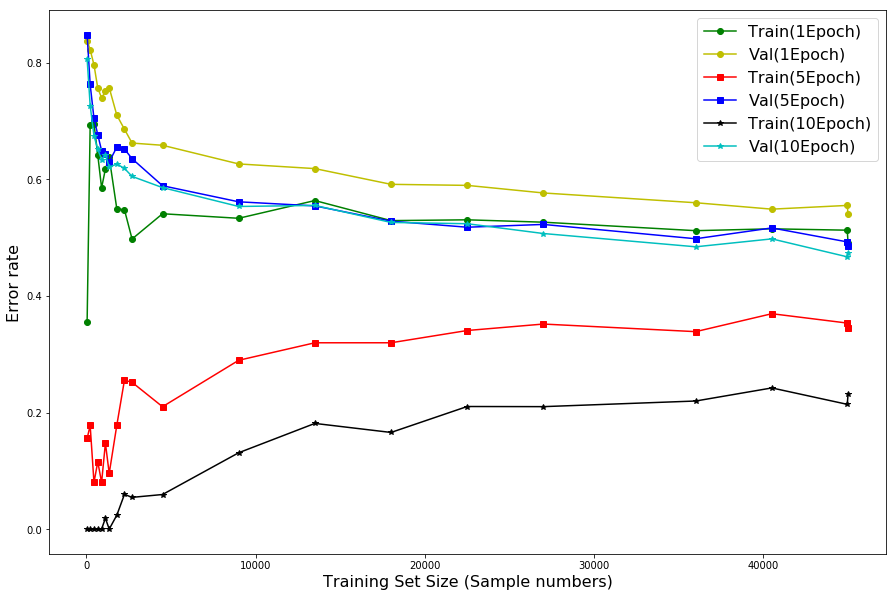

In [190]:
#Drawing learning curve
plt.figure(figsize = (15,10))
plt.plot(Train_size_list_1ep, Train_error_list_1ep, 'go-', label = "Train(1Epoch)")
plt.plot(Train_size_list_1ep, Val_error_list_1ep, 'yo-', label = "Val(1Epoch)")
plt.plot(Train_size_list_5ep, Train_error_list_5ep, 'rs-', label = "Train(5Epoch)")
plt.plot(Train_size_list_5ep, Val_error_list_5ep, 'bs-', label = "Val(5Epoch)")
plt.plot(Train_size_list_10ep, Train_error_list_10ep, 'k*-', label = "Train(10Epoch)")
plt.plot(Train_size_list_10ep, Val_error_list_10ep, 'c*-', label = "Val(10Epoch)")
 

plt.xlabel('Training Set Size (Sample numbers)',fontsize=16)
plt.ylabel('Error rate',fontsize=16)
plt.legend(loc="upper right", fontsize=16)
#plt.xlim(0,10000)

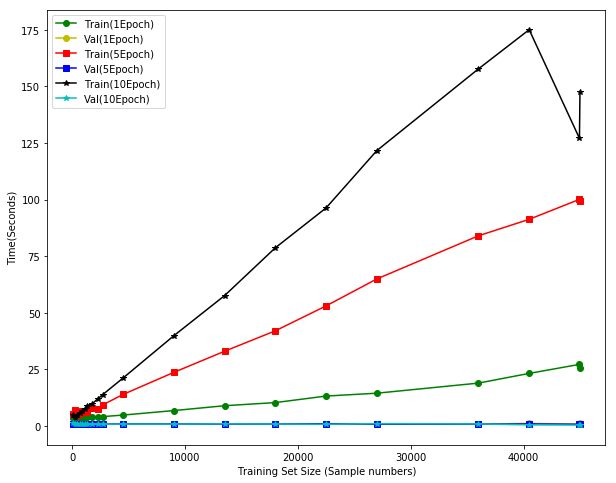

In [274]:
#Drawing train/val time v.s. training set

plt.figure(figsize = (10,8))
plt.plot(Train_size_list_1ep, Train_time_list_1ep, 'go-', label = "Train(1Epoch)")
plt.plot(Train_size_list_1ep, Val_time_list_1ep, 'yo-', label = "Val(1Epoch)")
plt.plot(Train_size_list_5ep, Train_time_list_5ep, 'rs-', label = "Train(5Epoch)")
plt.plot(Train_size_list_5ep, Val_time_list_5ep, 'bs-', label = "Val(5Epoch)")
plt.plot(Train_size_list_10ep, Train_time_list_10ep, 'k*-', label = "Train(10Epoch)")
plt.plot(Train_size_list_10ep, Val_time_list_10ep, 'c*-', label = "Val(10Epoch)")
 

plt.xlabel('Training Set Size (Sample numbers)')
plt.ylabel('Time(Seconds)')
plt.legend(loc="upper left", fontsize=10)

#  USING THE CODE BELOW TO CHANGE VALUES OF NEURONS FOR DIFFERENT ACTIVATION FUNCTIONS TO FIND THE BEST ACTIVATION FUNCTION

In [191]:
Nron_size_list_RELU = []
Train_error_list_RELU = []
Val_error_list_RELU = []
Train_time_list_RELU = []
Val_time_list_RELU = []

for j in [100, 150, 200, 250, 300, 350, 400, 450, 500, 1000, 1500, 2000, 3000, 4000]:

    Nron_size_list_RELU.append(j)
    print('Neuron_set_size:', j)
    
    config = tf.contrib.learn.RunConfig(tf_random_seed=42) 
    feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train_s)
    
    dnn_1_clf_nron = tf.contrib.learn.DNNClassifier(hidden_units=[j], n_classes=10, feature_columns=feature_columns, config=config)
    dnn_1_clf_nron = tf.contrib.learn.SKCompat(dnn_1_clf_nron) # if TensorFlow >= 1.1

    start=datetime.now()
    dnn_1_clf_nron.fit(X_train_s, y_train, batch_size=200, steps=((1-0)*1100) )
    Train_elapse = (datetime.now()-start).total_seconds()
    print('dnn_1_clf_nron training time', Train_elapse)
    Train_time_list_RELU.append(Train_elapse)
    
    y_train_pred = dnn_1_clf_nron.predict(X_train_s) #return dictionary
    Train_error = 1 - accuracy_score(y_train, y_train_pred['classes'])


   
    start=datetime.now()
    y_val_pred =  dnn_1_clf_nron.predict(X_val_s)
    
    Val_elapse = (datetime.now()-start).total_seconds()
    #print('dnn_1_clf val time', Val_elapse)
    Val_time_list_RELU.append(Val_elapse)
    
    Val_error = 1 - accuracy_score(y_val, y_val_pred['classes'])

    print('Train error, Val_error',  Train_error, '/', Val_error)
                                   
    Train_error_list_RELU.append(Train_error)
    Val_error_list_RELU.append(Val_error)
    
print("Nron_size_list_RELU: ", Nron_size_list_RELU)
print("Train_error_list_RELU: ", Train_error_list_RELU)
print("Val_error_list_RELU: ", Val_error_list_RELU)
print("Train_time_list_RELU: ", Train_time_list_RELU)
print("Val_time_list_RELU: ", Val_time_list_RELU)   

Neuron_set_size: 100
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002008E0A55F8>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\parva\\AppData\\Local\\Temp\\tmp56pfa21z'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\parva\AppData\Local\Temp\tmpdhenfkh2\model.ckpt-1100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.4101111111111111 / 0.49839999999999995
Neuron_set_size: 250
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002009CE584E0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_c

INFO:tensorflow:global_step/sec: 47.5385
INFO:tensorflow:loss = 1.0946794, step = 1001 (2.088 sec)
INFO:tensorflow:Saving checkpoints for 1100 into C:\Users\parva\AppData\Local\Temp\tmph34enql5\model.ckpt.
INFO:tensorflow:Loss for final step: 1.3064734.
dnn_1_clf_nron training time 24.869605
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\parva\AppData\Local\Temp\tmph34enql5\model.ckpt-1100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\parva\AppData\Local\Temp\tmph34enql5\model.ckpt-1100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.4178222222222222 / 0.5136000000000001
Neuron_set_size: 400
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002008C546C88>, '_master':

INFO:tensorflow:loss = 1.3036517, step = 501 (2.771 sec)
INFO:tensorflow:global_step/sec: 36.0688
INFO:tensorflow:loss = 1.4199084, step = 601 (2.772 sec)
INFO:tensorflow:global_step/sec: 35.995
INFO:tensorflow:loss = 1.2044148, step = 701 (2.778 sec)
INFO:tensorflow:global_step/sec: 36.2522
INFO:tensorflow:loss = 1.2520308, step = 801 (2.758 sec)
INFO:tensorflow:global_step/sec: 36.5517
INFO:tensorflow:loss = 1.1664183, step = 901 (2.736 sec)
INFO:tensorflow:global_step/sec: 34.3873
INFO:tensorflow:loss = 1.1132022, step = 1001 (2.908 sec)
INFO:tensorflow:Saving checkpoints for 1100 into C:\Users\parva\AppData\Local\Temp\tmpq_z26qst\model.ckpt.
INFO:tensorflow:Loss for final step: 1.2516783.
dnn_1_clf_nron training time 33.161939
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\parva\AppData\Local\Temp\tmpq_z26qst\model.ckpt-1100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized

INFO:tensorflow:loss = 2.7269819, step = 1
INFO:tensorflow:global_step/sec: 9.12365
INFO:tensorflow:loss = 1.6694964, step = 101 (10.964 sec)
INFO:tensorflow:global_step/sec: 8.74815
INFO:tensorflow:loss = 1.6908946, step = 201 (11.431 sec)
INFO:tensorflow:global_step/sec: 8.64525
INFO:tensorflow:loss = 1.6428275, step = 301 (11.576 sec)
INFO:tensorflow:global_step/sec: 9.72646
INFO:tensorflow:loss = 1.483964, step = 401 (10.271 sec)
INFO:tensorflow:global_step/sec: 10.0453
INFO:tensorflow:loss = 1.412322, step = 501 (9.956 sec)
INFO:tensorflow:global_step/sec: 10.043
INFO:tensorflow:loss = 1.5638596, step = 601 (9.957 sec)
INFO:tensorflow:global_step/sec: 9.96971
INFO:tensorflow:loss = 1.206954, step = 701 (10.029 sec)
INFO:tensorflow:global_step/sec: 10.2024
INFO:tensorflow:loss = 1.2844515, step = 801 (9.802 sec)
INFO:tensorflow:global_step/sec: 10.3368
INFO:tensorflow:loss = 1.1861892, step = 901 (9.672 sec)
INFO:tensorflow:global_step/sec: 10.3854
INFO:tensorflow:loss = 1.0562122,

In [192]:
Nron_size_list_SIGMO = []
Train_error_list_SIGMO = []
Val_error_list_SIGMO= []
Train_time_list_SIGMO = []
Val_time_list_SIGMO = []


for j in [50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 1000, 1500, 2000, 3000, 4000]:

    Nron_size_list_SIGMO.append(j)
    print('Neuron_set_size:', j)
    
    
    config = tf.contrib.learn.RunConfig(tf_random_seed=42) 
    feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train_s)
    
    dnn_1_clf_nron = tf.contrib.learn.DNNClassifier(hidden_units=[j], n_classes=10,activation_fn=tf.nn.sigmoid, feature_columns=feature_columns, config=config)
    dnn_1_clf_nron = tf.contrib.learn.SKCompat(dnn_1_clf_nron) # if TensorFlow >= 1.1

    start=datetime.now()
    dnn_1_clf_nron.fit(X_train_s, y_train, batch_size=200, steps=((1-0)*1100) )
    Train_elapse = (datetime.now()-start).total_seconds()
    print('dnn_1_clf_nron training time', Train_elapse)
    Train_time_list_SIGMO.append(Train_elapse)
    
    y_train_pred = dnn_1_clf_nron.predict(X_train_s) #return dictionary
    Train_error = 1 - accuracy_score(y_train, y_train_pred['classes'])

   
    start=datetime.now()
    y_val_pred =  dnn_1_clf_nron.predict(X_val_s)
    
    Val_elapse = (datetime.now()-start).total_seconds()
    #print('dnn_1_clf val time', Val_elapse)
    Val_time_list_SIGMO.append(Val_elapse)
    
    Val_error = 1 - accuracy_score(y_val, y_val_pred['classes'])
 
    
    print('Train error, Val_error',  Train_error, '/', Val_error)
                                   
    Train_error_list_SIGMO.append(Train_error)
    Val_error_list_SIGMO.append(Val_error)
    
print("Nron_size_list_SIGMO: ", Nron_size_list_SIGMO)
print("Train_error_list_SIGMO: ", Train_error_list_SIGMO)
print("Val_error_list_SIGMO: ", Val_error_list_SIGMO)
print("Train_time_list_SIGMO: ", Train_time_list_SIGMO)
print("Val_time_list_SIGMO: ", Val_time_list_SIGMO) 

Neuron_set_size: 50
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000020091012550>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\parva\\AppData\\Local\\Temp\\tmp8jzl5ovn'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into 

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\parva\AppData\Local\Temp\tmp394m80ln\model.ckpt-1100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.510888888888889 / 0.5618000000000001
Neuron_set_size: 200
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002009CD99E48>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_che

INFO:tensorflow:global_step/sec: 42.6919
INFO:tensorflow:loss = 1.4906086, step = 1001 (2.340 sec)
INFO:tensorflow:Saving checkpoints for 1100 into C:\Users\parva\AppData\Local\Temp\tmptkh5dxci\model.ckpt.
INFO:tensorflow:Loss for final step: 1.5083106.
dnn_1_clf_nron training time 31.710318
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\parva\AppData\Local\Temp\tmptkh5dxci\model.ckpt-1100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\parva\AppData\Local\Temp\tmptkh5dxci\model.ckpt-1100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.5036444444444445 / 0.5618000000000001
Neuron_set_size: 350
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002009CF23908>, '_master':

INFO:tensorflow:loss = 1.5964746, step = 501 (3.219 sec)
INFO:tensorflow:global_step/sec: 37.9706
INFO:tensorflow:loss = 1.7292705, step = 601 (2.634 sec)
INFO:tensorflow:global_step/sec: 35.0097
INFO:tensorflow:loss = 1.4992725, step = 701 (2.856 sec)
INFO:tensorflow:global_step/sec: 35.5151
INFO:tensorflow:loss = 1.5604279, step = 801 (2.817 sec)
INFO:tensorflow:global_step/sec: 39.2437
INFO:tensorflow:loss = 1.4680641, step = 901 (2.548 sec)
INFO:tensorflow:global_step/sec: 35.7333
INFO:tensorflow:loss = 1.4792284, step = 1001 (2.799 sec)
INFO:tensorflow:Saving checkpoints for 1100 into C:\Users\parva\AppData\Local\Temp\tmpn0apetdb\model.ckpt.
INFO:tensorflow:Loss for final step: 1.5040795.
dnn_1_clf_nron training time 32.069839
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\parva\AppData\Local\Temp\tmpn0apetdb\model.ckpt-1100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalize

INFO:tensorflow:global_step/sec: 13.1938
INFO:tensorflow:loss = 2.3482065, step = 101 (7.581 sec)
INFO:tensorflow:global_step/sec: 12.7047
INFO:tensorflow:loss = 1.8440686, step = 201 (7.872 sec)
INFO:tensorflow:global_step/sec: 13.2862
INFO:tensorflow:loss = 1.8834982, step = 301 (7.532 sec)
INFO:tensorflow:global_step/sec: 12.8754
INFO:tensorflow:loss = 1.7864081, step = 401 (7.758 sec)
INFO:tensorflow:global_step/sec: 12.739
INFO:tensorflow:loss = 1.6699008, step = 501 (7.866 sec)
INFO:tensorflow:global_step/sec: 13.3094
INFO:tensorflow:loss = 1.9815251, step = 601 (7.498 sec)
INFO:tensorflow:global_step/sec: 13.2217
INFO:tensorflow:loss = 1.579987, step = 701 (7.566 sec)
INFO:tensorflow:global_step/sec: 13.1787
INFO:tensorflow:loss = 1.7222959, step = 801 (7.588 sec)
INFO:tensorflow:global_step/sec: 13.3473
INFO:tensorflow:loss = 1.5087318, step = 901 (7.505 sec)
INFO:tensorflow:global_step/sec: 12.8424
INFO:tensorflow:loss = 1.5064892, step = 1001 (7.773 sec)
INFO:tensorflow:Savin

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\parva\AppData\Local\Temp\tmpcfbbr_2_\model.ckpt.
INFO:tensorflow:loss = 2.447732, step = 1
INFO:tensorflow:global_step/sec: 4.57722
INFO:tensorflow:loss = 5.6349087, step = 101 (21.848 sec)
INFO:tensorflow:global_step/sec: 4.63944
INFO:tensorflow:loss = 4.3972464, step = 201 (21.555 sec)
INFO:tensorflow:global_step/sec: 4.26139
INFO:tensorflow:loss = 2.316514, step = 301 (23.467 sec)
INFO:tensorflow:global_step/sec: 4.40665
INFO:tensorflow:loss = 2.8293133, step = 401 (22.692 sec)
INFO:tensorflow:global_step/sec: 4.61377
INFO:tensorflow:loss = 2.2339866, step = 501 (21.675 sec)
INFO:tensorflow:global_step/sec: 4.39516
INFO:tensorflow:loss = 3.3615878, step = 601 (22.834 sec)
INFO:tensorflow:global_step/sec: 4.60618
INFO:tensorflow:loss = 2.228959, step = 701 (21.628 sec)

In [195]:
Nron_size_list_ELU = []
Train_error_list_ELU = []
Val_error_list_ELU = []
Train_time_list_ELU = []
Val_time_list_ELU = []


for j in [50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 1000, 2000, 3000, 4000]:
    Nron_size_list_ELU.append(j)
    print('Neuron_set_size:', j)
    
    config = tf.contrib.learn.RunConfig(tf_random_seed=42) 
    feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train_s)
    
    dnn_1_clf_nron = tf.contrib.learn.DNNClassifier(hidden_units=[j], n_classes=10,activation_fn=tf.nn.elu, feature_columns=feature_columns, config=config)
    dnn_1_clf_nron = tf.contrib.learn.SKCompat(dnn_1_clf_nron) # if TensorFlow >= 1.1
    
    start=datetime.now()
    dnn_1_clf_nron.fit(X_train_s, y_train, batch_size=200, steps=((1-0)*1100) )
    Train_elapse = (datetime.now()-start).total_seconds()
    print('dnn_1_clf_nron training time', Train_elapse)
    Train_time_list_ELU.append(Train_elapse)
    
    y_train_pred = dnn_1_clf_nron.predict(X_train_s) #return dictionary
    Train_error = 1 - accuracy_score(y_train, y_train_pred['classes'])

   
    start=datetime.now()
    y_val_pred =  dnn_1_clf_nron.predict(X_val_s)
    
    Val_elapse = (datetime.now()-start).total_seconds()
    #print('dnn_1_clf val time', Val_elapse)
    Val_time_list_ELU.append(Val_elapse)
    
    Val_error = 1 - accuracy_score(y_val, y_val_pred['classes'])

    print('Train error, Val_error',  Train_error, '/', Val_error)
                                   
    Train_error_list_ELU.append(Train_error)
    Val_error_list_ELU.append(Val_error)
    
print("Nron_size_list_ELU: ", Nron_size_list_ELU)
print("Train_error_list_ELU: ", Train_error_list_ELU)
print("Val_error_list_ELU: ", Val_error_list_ELU)
print("Train_time_list_ELU: ", Train_time_list_ELU)
print("Val_time_list_ELU: ", Val_time_list_ELU)

Neuron_set_size: 50
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002008C9B7A58>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\parva\\AppData\\Local\\Temp\\tmpmlux8rqn'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into 

INFO:tensorflow:Restoring parameters from C:\Users\parva\AppData\Local\Temp\tmp3w30or44\model.ckpt-1100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\parva\AppData\Local\Temp\tmp3w30or44\model.ckpt-1100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.4360666666666667 / 0.49860000000000004
Neuron_set_size: 200
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002008CCD90F0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_ch

INFO:tensorflow:global_step/sec: 59.1696
INFO:tensorflow:loss = 1.3229932, step = 901 (1.692 sec)
INFO:tensorflow:global_step/sec: 63.9467
INFO:tensorflow:loss = 1.2141324, step = 1001 (1.577 sec)
INFO:tensorflow:Saving checkpoints for 1100 into C:\Users\parva\AppData\Local\Temp\tmp17g86u4k\model.ckpt.
INFO:tensorflow:Loss for final step: 1.3506278.
dnn_1_clf_nron training time 23.383388
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\parva\AppData\Local\Temp\tmp17g86u4k\model.ckpt-1100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\parva\AppData\Local\Temp\tmp17g86u4k\model.ckpt-1100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.44291111111111114 / 0.5146
Neuron_set_size: 350
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tens

INFO:tensorflow:loss = 1.4705877, step = 401 (2.124 sec)
INFO:tensorflow:global_step/sec: 46.6186
INFO:tensorflow:loss = 1.4093667, step = 501 (2.145 sec)
INFO:tensorflow:global_step/sec: 29.2872
INFO:tensorflow:loss = 1.5067415, step = 601 (3.414 sec)
INFO:tensorflow:global_step/sec: 46.457
INFO:tensorflow:loss = 1.3112384, step = 701 (2.168 sec)
INFO:tensorflow:global_step/sec: 29.0463
INFO:tensorflow:loss = 1.2820327, step = 801 (3.443 sec)
INFO:tensorflow:global_step/sec: 46.5068
INFO:tensorflow:loss = 1.3146526, step = 901 (2.135 sec)
INFO:tensorflow:global_step/sec: 29.1201
INFO:tensorflow:loss = 1.1999838, step = 1001 (3.434 sec)
INFO:tensorflow:Saving checkpoints for 1100 into C:\Users\parva\AppData\Local\Temp\tmpup3wm55z\model.ckpt.
INFO:tensorflow:Loss for final step: 1.3560891.
dnn_1_clf_nron training time 30.818865
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\parva\AppData\Local\Temp\tmpup3wm55z\model.ckpt-1100
INFO:tensorflow:Runn

INFO:tensorflow:loss = 2.8303528, step = 1
INFO:tensorflow:global_step/sec: 8.08207
INFO:tensorflow:loss = 1.7231642, step = 101 (12.375 sec)
INFO:tensorflow:global_step/sec: 9.03066
INFO:tensorflow:loss = 1.8094162, step = 201 (11.071 sec)
INFO:tensorflow:global_step/sec: 8.78647
INFO:tensorflow:loss = 1.685427, step = 301 (11.381 sec)
INFO:tensorflow:global_step/sec: 5.7706
INFO:tensorflow:loss = 1.5090121, step = 401 (17.337 sec)
INFO:tensorflow:global_step/sec: 7.14457
INFO:tensorflow:loss = 1.4698216, step = 501 (13.991 sec)
INFO:tensorflow:global_step/sec: 8.97287
INFO:tensorflow:loss = 1.6006397, step = 601 (11.143 sec)
INFO:tensorflow:global_step/sec: 8.09934
INFO:tensorflow:loss = 1.3680896, step = 701 (12.349 sec)
INFO:tensorflow:global_step/sec: 7.54827
INFO:tensorflow:loss = 1.3246591, step = 801 (13.248 sec)
INFO:tensorflow:global_step/sec: 7.60211
INFO:tensorflow:loss = 1.3949499, step = 901 (13.152 sec)
INFO:tensorflow:global_step/sec: 6.97827
INFO:tensorflow:loss = 1.37

In [194]:
Nron_size_list_TANH = []
Train_error_list_TANH = []
Val_error_list_TANH= []
Train_time_list_TANH = []
Val_time_list_TANH = []


for j in [50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 1000, 2000, 3000, 4000]:
    Nron_size_list_TANH.append(j)
    print('Neuron_set_size:', j)
    

    config = tf.contrib.learn.RunConfig(tf_random_seed=42) 
    feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train_s)
    
    dnn_1_clf_nron = tf.contrib.learn.DNNClassifier(hidden_units=[j], n_classes=10,activation_fn=tf.nn.tanh, feature_columns=feature_columns, config=config)
    dnn_1_clf_nron = tf.contrib.learn.SKCompat(dnn_1_clf_nron) # if TensorFlow >= 1.1

    
    start=datetime.now()
    dnn_1_clf_nron.fit(X_train_s, y_train, batch_size=200, steps=((1-0)*1100) )
    Train_elapse = (datetime.now()-start).total_seconds()
    print('dnn_1_clf_nron training time', Train_elapse)
    Train_time_list_TANH.append(Train_elapse)
    
    y_train_pred = dnn_1_clf_nron.predict(X_train_s) #return dictionary
    Train_error = 1 - accuracy_score(y_train, y_train_pred['classes'])

    start=datetime.now()
    y_val_pred =  dnn_1_clf_nron.predict(X_val_s)
    
    Val_elapse = (datetime.now()-start).total_seconds()
    #print('dnn_1_clf val time', Val_elapse)
    Val_time_list_TANH.append(Val_elapse)
    
    Val_error = 1 - accuracy_score(y_val, y_val_pred['classes'])
 
    
    print('Train error, Val_error',  Train_error, '/', Val_error)
                                   
    Train_error_list_TANH.append(Train_error)
    Val_error_list_TANH.append(Val_error)
    
print("Nron_size_list_TANH: ", Nron_size_list_TANH)
print("Train_error_list_TANH: ", Train_error_list_TANH)
print("Val_error_list_TANH: ", Val_error_list_TANH)
print("Train_time_list_TANH: ", Train_time_list_TANH)
print("Val_time_list_TANH: ", Val_time_list_TANH)

Neuron_set_size: 50
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000020090F8C7B8>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\parva\\AppData\\Local\\Temp\\tmp1fsnywj_'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into 

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\parva\AppData\Local\Temp\tmp0ngjxrnj\model.ckpt-1100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.4635111111111111 / 0.5638000000000001
Neuron_set_size: 200
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002008E292DD8>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_ch

INFO:tensorflow:global_step/sec: 42.2133
INFO:tensorflow:loss = 1.3049144, step = 1001 (2.362 sec)
INFO:tensorflow:Saving checkpoints for 1100 into C:\Users\parva\AppData\Local\Temp\tmp_83m5sgo\model.ckpt.
INFO:tensorflow:Loss for final step: 1.3681443.
dnn_1_clf_nron training time 23.874725
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\parva\AppData\Local\Temp\tmp_83m5sgo\model.ckpt-1100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\parva\AppData\Local\Temp\tmp_83m5sgo\model.ckpt-1100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.42213333333333336 / 0.5524
Neuron_set_size: 350
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000200909251D0>, '_master': '', '_num_

INFO:tensorflow:loss = 1.4516193, step = 501 (2.819 sec)
INFO:tensorflow:global_step/sec: 36.6595
INFO:tensorflow:loss = 1.5526217, step = 601 (2.725 sec)
INFO:tensorflow:global_step/sec: 37.0635
INFO:tensorflow:loss = 1.3450263, step = 701 (2.700 sec)
INFO:tensorflow:global_step/sec: 33.2292
INFO:tensorflow:loss = 1.4343334, step = 801 (3.010 sec)
INFO:tensorflow:global_step/sec: 35.6571
INFO:tensorflow:loss = 1.2851447, step = 901 (2.802 sec)
INFO:tensorflow:global_step/sec: 33.1513
INFO:tensorflow:loss = 1.2924619, step = 1001 (3.016 sec)
INFO:tensorflow:Saving checkpoints for 1100 into C:\Users\parva\AppData\Local\Temp\tmp6bf6erjs\model.ckpt.
INFO:tensorflow:Loss for final step: 1.3685813.
dnn_1_clf_nron training time 33.934749
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\parva\AppData\Local\Temp\tmp6bf6erjs\model.ckpt-1100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalize

INFO:tensorflow:loss = 2.6019094, step = 1
INFO:tensorflow:global_step/sec: 11.8543
INFO:tensorflow:loss = 1.9168353, step = 101 (8.436 sec)
INFO:tensorflow:global_step/sec: 11.5536
INFO:tensorflow:loss = 1.820892, step = 201 (8.655 sec)
INFO:tensorflow:global_step/sec: 11.4152
INFO:tensorflow:loss = 1.7620304, step = 301 (8.760 sec)
INFO:tensorflow:global_step/sec: 11.4923
INFO:tensorflow:loss = 1.5527513, step = 401 (8.702 sec)
INFO:tensorflow:global_step/sec: 11.5166
INFO:tensorflow:loss = 1.5630288, step = 501 (8.683 sec)
INFO:tensorflow:global_step/sec: 11.5036
INFO:tensorflow:loss = 1.6856971, step = 601 (8.693 sec)
INFO:tensorflow:global_step/sec: 11.4539
INFO:tensorflow:loss = 1.4261079, step = 701 (8.733 sec)
INFO:tensorflow:global_step/sec: 11.5346
INFO:tensorflow:loss = 1.4504585, step = 801 (8.670 sec)
INFO:tensorflow:global_step/sec: 11.445
INFO:tensorflow:loss = 1.3874221, step = 901 (8.735 sec)
INFO:tensorflow:global_step/sec: 11.2435
INFO:tensorflow:loss = 1.4628927, st

# PLOTTING ERRORS OF DIFFERENT ACTIVATION FUNCTIONS

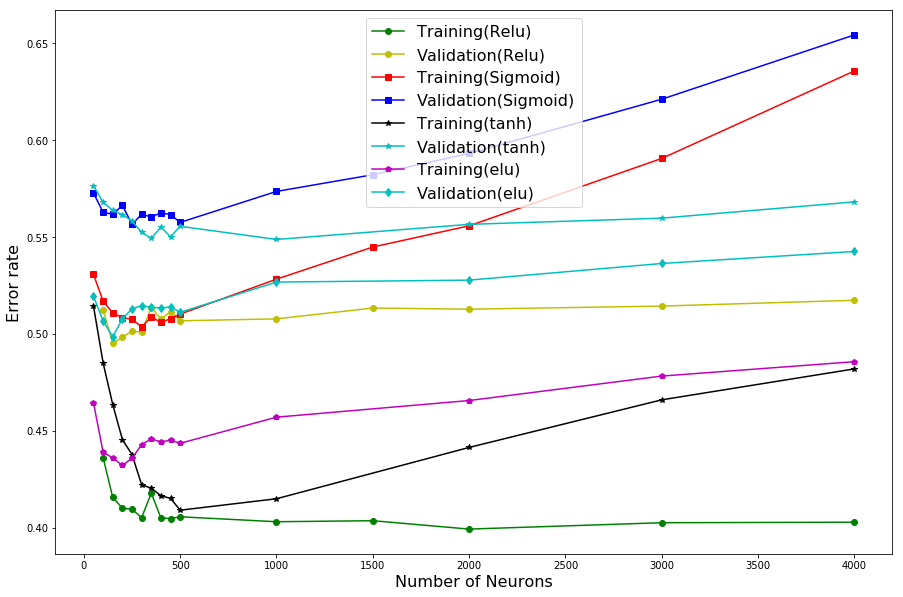

In [202]:
plt.figure(figsize = (15,10))
plt.plot(Nron_size_list_RELU, Train_error_list_RELU, 'go-', label = "Training(Relu)")
plt.plot(Nron_size_list_RELU, Val_error_list_RELU, 'yo-', label = "Validation(Relu)")
plt.plot(Nron_size_list_SIGMO, Train_error_list_SIGMO, 'rs-', label = "Training(Sigmoid)")
plt.plot(Nron_size_list_SIGMO, Val_error_list_SIGMO, 'bs-', label = "Validation(Sigmoid)") 
plt.plot(Nron_size_list_TANH, Train_error_list_TANH, 'k*-', label = "Training(tanh)")
plt.plot(Nron_size_list_TANH, Val_error_list_TANH, 'c*-', label = "Validation(tanh)")
plt.plot(Nron_size_list_TANH, Train_error_list_ELU, 'mp-', label = "Training(elu)")
plt.plot(Nron_size_list_TANH, Val_error_list_ELU, 'cd-', label = "Validation(elu)")

plt.xlabel('Number of Neurons',fontsize=16)
plt.ylabel('Error rate',fontsize=16)
plt.legend(fontsize=16)

In [32]:
Nron_size_list_RELU = []
Train_error_list_RELU = []
Val_error_list_RELU = []
Train_time_list_RELU = []
Val_time_list_RELU = []

from sklearn.model_selection import train_test_split
from datetime import datetime

for i in [300, 400, 500, 600, 700]:
    
    for j in [1000, 200, 3000, 4000, 5000]: 
    
    
    
        Nron_size_list_RELU.append((i,j))
        print('Neuron_set_size:', (i,j))
         
        X_train_scaled_partial, X_noneed, y_train_partial, y_noneed  = train_test_split(X_train_s, y_train, test_size = 0, random_state = 42)
    
    
        config = tf.contrib.learn.RunConfig(tf_random_seed=42) 
        feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train_scaled_partial)
    
        dnn_1_clf_nron = tf.contrib.learn.DNNClassifier(hidden_units=[i,j], n_classes=10, feature_columns=feature_columns, config=config)
        dnn_1_clf_nron = tf.contrib.learn.SKCompat(dnn_1_clf_nron) # if TensorFlow >= 1.1
        #dnn_1_clf.fit(X_train_partial, y_train_partial, batch_size=50, max_steps=40000)
    
        start=datetime.now()
        dnn_1_clf_nron.fit(X_train_scaled_partial, y_train_partial, batch_size=50, steps=((1-0)*1100) )
        Train_elapse = (datetime.now()-start).total_seconds()
        print('dnn_1_clf_nron training time', Train_elapse)
        Train_time_list_RELU.append(Train_elapse)
    
        y_train_partial_pred = dnn_1_clf_nron.predict(X_train_scaled_partial) #return dictionary
        Train_error = 1 - accuracy_score(y_train_partial, y_train_partial_pred['classes'])

   
        start=datetime.now()
        y_val_pred =  dnn_1_clf_nron.predict(X_val_s)
    
        Val_elapse = (datetime.now()-start).total_seconds()
        
        Val_time_list_RELU.append(Val_elapse)
    
        Val_error = 1 - accuracy_score(y_val, y_val_pred['classes'])
    
        print('Train error, Val_error',  Train_error, '/', Val_error)
                                   
        Train_error_list_RELU.append(Train_error)
        Val_error_list_RELU.append(Val_error)
    
print("Nron_size_list_RELU: ", Nron_size_list_RELU)
print("Train_error_list_RELU: ", Train_error_list_RELU)
print("Val_error_list_RELU: ", Val_error_list_RELU)
print("Train_time_list_RELU: ", Train_time_list_RELU)
print("Val_time_list_RELU: ", Val_time_list_RELU)

Neuron_set_size: (300, 1000)
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001C60F070BA8>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\parva\\AppData\\Local\\Temp\\tmpsiq68nve'}
Instructions for updating:
Please feed input to tf.data to support dask.
Instructions for updating:
Please access pandas data directly.
Instructions for updating:
When switching to tf.estimator.Estimat

INFO:tensorflow:global_step/sec: 45.746
INFO:tensorflow:loss = 1.5208714, step = 201 (2.186 sec)
INFO:tensorflow:global_step/sec: 44.1918
INFO:tensorflow:loss = 1.7217995, step = 301 (2.265 sec)
INFO:tensorflow:global_step/sec: 49.2439
INFO:tensorflow:loss = 1.6152854, step = 401 (2.031 sec)
INFO:tensorflow:global_step/sec: 59.0452
INFO:tensorflow:loss = 1.5394897, step = 501 (1.695 sec)
INFO:tensorflow:global_step/sec: 54.7089
INFO:tensorflow:loss = 1.7729111, step = 601 (1.827 sec)
INFO:tensorflow:global_step/sec: 55.4462
INFO:tensorflow:loss = 1.4682117, step = 701 (1.804 sec)
INFO:tensorflow:global_step/sec: 53.2094
INFO:tensorflow:loss = 1.4926283, step = 801 (1.880 sec)
INFO:tensorflow:global_step/sec: 57.5029
INFO:tensorflow:loss = 1.3184084, step = 901 (1.752 sec)
INFO:tensorflow:global_step/sec: 56.8755
INFO:tensorflow:loss = 1.3847574, step = 1001 (1.746 sec)
INFO:tensorflow:Saving checkpoints for 1100 into C:\Users\parva\AppData\Local\Temp\tmpxeefp222\model.ckpt.
INFO:tensor

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\parva\AppData\Local\Temp\tmp7fwvi28k\model.ckpt.
INFO:tensorflow:loss = 2.4743972, step = 1
INFO:tensorflow:global_step/sec: 60.5509
INFO:tensorflow:loss = 1.4704989, step = 101 (1.652 sec)
INFO:tensorflow:global_step/sec: 62.0783
INFO:tensorflow:loss = 1.5244205, step = 201 (1.615 sec)
INFO:tensorflow:global_step/sec: 46.9751
INFO:tensorflow:loss = 1.6030068, step = 301 (2.128 sec)
INFO:tensorflow:global_step/sec: 53.268
INFO:tensorflow:loss = 1.541015, step = 401 (1.874 sec)
INFO:tensorflow:global_step/sec: 70.1051
INFO:tensorflow:loss = 1.6106713, step = 501 (1.423 sec)
INFO:tensorflow:global_step/sec: 61.425
INFO:tensorflow:loss = 1.7545791, step = 601 (1.632 sec)
INFO:tensorflow:global_step/sec: 66.9548
INFO:tensorflow:loss = 1.516818, step = 701 (1.490 sec)
INFO:te

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\parva\AppData\Local\Temp\tmp4lrzu1f5\model.ckpt.
INFO:tensorflow:loss = 2.3452358, step = 1
INFO:tensorflow:global_step/sec: 25.2559
INFO:tensorflow:loss = 1.4790044, step = 101 (3.962 sec)
INFO:tensorflow:global_step/sec: 28.3009
INFO:tensorflow:loss = 1.5844105, step = 201 (3.533 sec)
INFO:tensorflow:global_step/sec: 26.2436
INFO:tensorflow:loss = 1.762111, step = 301 (3.808 sec)
INFO:tensorflow:global_step/sec: 32.5639
INFO:tensorflow:loss = 1.5824373, step = 401 (3.069 sec)
INFO:tensorflow:global_step/sec: 40.1433
INFO:tensorflow:loss = 1.5546026, step = 501 (2.491 sec)
INFO:tensorflow:global_step/sec: 35.1539
INFO:tensorflow:loss = 1.8294933, step = 601 (2.849 sec)
INFO:tensorflow:global_step/sec: 35.8466
INFO:tensorflow:loss = 1.4780585, step = 701 (2.789 sec)
INFO

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\parva\AppData\Local\Temp\tmpx6u6pa_r\model.ckpt.
INFO:tensorflow:loss = 3.1078513, step = 1
INFO:tensorflow:global_step/sec: 80.8474
INFO:tensorflow:loss = 1.5382032, step = 101 (1.238 sec)
INFO:tensorflow:global_step/sec: 83.9057
INFO:tensorflow:loss = 1.6182022, step = 201 (1.193 sec)
INFO:tensorflow:global_step/sec: 82.0522
INFO:tensorflow:loss = 1.578898, step = 301 (1.220 sec)
INFO:tensorflow:global_step/sec: 77.1289
INFO:tensorflow:loss = 1.6086388, step = 401 (1.296 sec)
INFO:tensorflow:global_step/sec: 75.6166
INFO:tensorflow:loss = 1.566262, step = 501 (1.322 sec)
INFO:tensorflow:global_step/sec: 74.6039
INFO:tensorflow:loss = 1.8212003, step = 601 (1.341 sec)
INFO:tensorflow:global_step/sec: 73.3485
INFO:tensorflow:loss = 1.4230074, step = 701 (1.362 sec)
INFO:

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\parva\AppData\Local\Temp\tmp8gbbe9y5\model.ckpt.
INFO:tensorflow:loss = 2.3315687, step = 1
INFO:tensorflow:global_step/sec: 26.568
INFO:tensorflow:loss = 1.4876151, step = 101 (3.765 sec)
INFO:tensorflow:global_step/sec: 27.0701
INFO:tensorflow:loss = 1.5693376, step = 201 (3.695 sec)
INFO:tensorflow:global_step/sec: 26.5117
INFO:tensorflow:loss = 1.700135, step = 301 (3.772 sec)
INFO:tensorflow:global_step/sec: 19.9438
INFO:tensorflow:loss = 1.5887924, step = 401 (5.021 sec)
INFO:tensorflow:global_step/sec: 20.7399
INFO:tensorflow:loss = 1.5341861, step = 501 (4.812 sec)
INFO:tensorflow:global_step/sec: 23.0133
INFO:tensorflow:loss = 1.8154707, step = 601 (4.356 sec)
INFO:tensorflow:global_step/sec: 24.4133
INFO:tensorflow:loss = 1.4986023, step = 701 (4.086 sec)
INFO:

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\parva\AppData\Local\Temp\tmpe0_sdua0\model.ckpt.
INFO:tensorflow:loss = 2.3781068, step = 1
INFO:tensorflow:global_step/sec: 30.5846
INFO:tensorflow:loss = 1.4631011, step = 101 (3.270 sec)
INFO:tensorflow:global_step/sec: 29.7116
INFO:tensorflow:loss = 1.5830476, step = 201 (3.366 sec)
INFO:tensorflow:global_step/sec: 22.0245
INFO:tensorflow:loss = 1.6567665, step = 301 (4.542 sec)
INFO:tensorflow:global_step/sec: 31.1834
INFO:tensorflow:loss = 1.5200611, step = 401 (3.205 sec)
INFO:tensorflow:global_step/sec: 20.586
INFO:tensorflow:loss = 1.5663862, step = 501 (4.858 sec)
INFO:tensorflow:global_step/sec: 22.1628
INFO:tensorflow:loss = 1.7951639, step = 601 (4.514 sec)
INFO:tensorflow:global_step/sec: 21.5914
INFO:tensorflow:loss = 1.470203, step = 701 (4.631 sec)
INFO:

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\parva\AppData\Local\Temp\tmpflw4biap\model.ckpt.
INFO:tensorflow:loss = 2.5625348, step = 1
INFO:tensorflow:global_step/sec: 37.9371
INFO:tensorflow:loss = 1.4819496, step = 101 (2.638 sec)
INFO:tensorflow:global_step/sec: 39.5704
INFO:tensorflow:loss = 1.5448724, step = 201 (2.528 sec)
INFO:tensorflow:global_step/sec: 37.8139
INFO:tensorflow:loss = 1.7172546, step = 301 (2.642 sec)
INFO:tensorflow:global_step/sec: 41.6725
INFO:tensorflow:loss = 1.6116545, step = 401 (2.415 sec)
INFO:tensorflow:global_step/sec: 36.6678
INFO:tensorflow:loss = 1.5629318, step = 501 (2.714 sec)
INFO:tensorflow:global_step/sec: 35.0586
INFO:tensorflow:loss = 1.8117752, step = 601 (2.852 sec)
INFO:tensorflow:global_step/sec: 34.6707
INFO:tensorflow:loss = 1.3920785, step = 701 (2.886 sec)
INF

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\parva\AppData\Local\Temp\tmpts1ho132\model.ckpt.
INFO:tensorflow:loss = 2.4485962, step = 1
INFO:tensorflow:global_step/sec: 18.0107
INFO:tensorflow:loss = 1.4745355, step = 101 (5.554 sec)
INFO:tensorflow:global_step/sec: 22.1335
INFO:tensorflow:loss = 1.5408041, step = 201 (4.518 sec)
INFO:tensorflow:global_step/sec: 18.1538
INFO:tensorflow:loss = 1.7142041, step = 301 (5.505 sec)
INFO:tensorflow:global_step/sec: 20.5615
INFO:tensorflow:loss = 1.6029692, step = 401 (4.863 sec)
INFO:tensorflow:global_step/sec: 24.6286
INFO:tensorflow:loss = 1.5315634, step = 501 (4.060 sec)
INFO:tensorflow:global_step/sec: 18.3427
INFO:tensorflow:loss = 1.7953515, step = 601 (5.455 sec)
INFO:tensorflow:global_step/sec: 14.838
INFO:tensorflow:loss = 1.467258, step = 701 (6.738 sec)
INFO:

In [59]:
Nron_size_list_FR =  [250, 275, 300, 325, 350, 375, 400, 425, 450, 475, 500, 525, 550, 575, 600, 625, 650, 675, 700, 725, 750, 784, 800]
Train_error_list_FR = [0.3676222222222222, 0.36693333333333333, 0.3551777777777778, 0.3620888888888889, 0.3538444444444444, 0.3578888888888889, 0.3599555555555556, 0.3583777777777778, 0.35873333333333335, 0.35302222222222224, 0.3562444444444445, 0.35144444444444445, 0.3538888888888889, 0.3551333333333333, 0.3464222222222222, 0.3559555555555556, 0.3476666666666667, 0.35097777777777783, 0.35368888888888894, 0.3469555555555556, 0.3549777777777777, 0.3499333333333333, 0.3532888888888889]
Val_error_list_FR = [0.5065999999999999, 0.4998, 0.4878, 0.5074000000000001, 0.5042, 0.4928, 0.5034000000000001, 0.499, 0.504, 0.503, 0.5045999999999999, 0.5084, 0.5022, 0.514, 0.49739999999999995, 0.5012, 0.5048, 0.5025999999999999, 0.5107999999999999, 0.5062, 0.5096, 0.5082, 0.5096]
Train_time_list_FR:  [54.802536, 139.621559, 58.740159, 63.958351, 69.348164, 77.49446, 74.198575, 85.024884, 85.83987, 89.370873, 91.838181, 95.535692, 96.803747, 105.256697, 105.012594, 117.005753, 115.989387, 118.883818, 120.898181, 126.453666, 129.265884, 132.712105, 138.658833]
Val_time_list_FR:  [0.562429, 0.673535, 0.713596, 0.579411, 0.534378, 0.685486, 0.613436, 0.681483, 0.616437, 0.643426, 0.705727, 0.625443, 0.712505, 0.667472, 0.73152, 0.698494, 0.700497, 0.828588, 0.765545, 0.769545, 0.819579, 0.78956, 0.940666]    

(0, 1000)

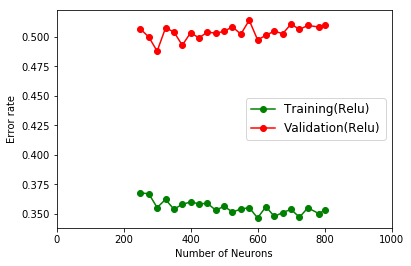

In [60]:
#plt.figure(figsize = (20,16))
plt.plot(Nron_size_list_FR, Train_error_list_FR, 'go-', label = "Training(Relu)")
plt.plot(Nron_size_list_FR, Val_error_list_FR, 'ro-', label = "Validation(Relu)")


plt.xlabel('Number of Neurons')
plt.ylabel('Error rate')
plt.legend( fontsize=12)
plt.xlim(0, 1000)

# FIXING RELU AND PLAYING AROUND WITH HYPERPARAMETERS [explained in report]

In [181]:
#learning curve

Train_size_list_1ep = []
Train_error_list_1ep = []
Val_error_list_1ep = []
Train_time_list_1ep = []
Val_time_list_1ep = []

config = tf.contrib.learn.RunConfig(tf_random_seed=42) 
feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train_s)
    
dnn_1_clf = tf.contrib.learn.DNNClassifier(activation_fn=tf.nn.relu, hidden_units=[1000,2000,1000], n_classes=10, feature_columns=feature_columns, config=config)
dnn_1_clf = tf.contrib.learn.SKCompat(dnn_1_clf) #### to be compatible with sklearn
    

from datetime import datetime
start=datetime.now()
dnn_1_clf.fit(X_train_s, y_train, batch_size=200, steps=(1100))
Train_elapse = (datetime.now()-start).total_seconds()
print('dnn_1_clf training time', Train_elapse)
Train_time_list_1ep.append(Train_elapse)
    
y_train_pred = dnn_1_clf.predict(X_train_s) #return dictionary
Train_error = 1 - accuracy_score(y_train, y_train_pred['classes'])

    
print(type(y_train_pred))

start=datetime.now()
y_val_pred =  dnn_1_clf.predict(X_val_s)
    
Val_elapse = (datetime.now()-start).total_seconds()

Val_time_list_1ep.append(Val_elapse)
Val_error = 1 - accuracy_score(y_val, y_val_pred['classes'])
      
    
print('Train error, Val_error',  Train_error, '/', Val_error)
                                   
Train_error_list_1ep.append(Train_error)
Val_error_list_1ep.append(Val_error)
    
print("Train_size: ", Train_size_list_1ep)
print("Train_error: ", Train_error_list_1ep)
print("Val_error: ", Val_error_list_1ep)
print("Train_time: ", Train_time_list_1ep)
print("Val_time: ", Val_time_list_1ep)  

accuracy = accuracy_score(y_val, y_val_pred['classes'])
accuracy

INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002008CAD8D68>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\parva\\AppData\\Local\\Temp\\tmpw878jmi4'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\parva\AppDa

0.5248

# Changing the above code with the values below and observing validation accuracy results

In [45]:
Neurons_1ep_1hiddenlayer_relu_50BS = [500, 1000, 1500, 2000, 3000, 4000]
Neurons_1ep_1hiddenlayer_relu_50BS

[500, 1000, 1500, 2000, 3000, 4000]

In [46]:
accuracy_1ep_1hiddenlayer_relu = [0.4178, 0.4124, 0.4046, 0.3942, 0.3902, 0.3842]
accuracy_1ep_1hiddenlayer_relu

[0.4178, 0.4124, 0.4046, 0.3942, 0.3902, 0.3842]

In [47]:
Neurons_1ep_1hiddenlayer_relu_100BS = [500, 1000, 1500, 2000, 3000, 4000]
Neurons_1ep_1hiddenlayer_relu_100BS

[500, 1000, 1500, 2000, 3000, 4000]

In [48]:
accuracy_1ep_1hiddenlayer_relu_100BS = [0.4876, 0.4796, 0.4752, 0.4654, 0.4646, 0.4554]
accuracy_1ep_1hiddenlayer_relu_100BS

[0.4876, 0.4796, 0.4752, 0.4654, 0.4646, 0.4554]

In [50]:
Neurons_1ep_1hiddenlayer_relu_200BS = [500, 1000, 1500, 2000, 3000, 4000]
Neurons_1ep_1hiddenlayer_relu_200BS

[500, 1000, 1500, 2000, 3000, 4000]

In [51]:
accuracy_1ep_1hiddenlayer_relu_200BS = [0.508, 0.5094, 0.5096, 0.5084, 0.4972, 0.4950]
accuracy_1ep_1hiddenlayer_relu_200BS

[0.508, 0.5094, 0.5096, 0.5084, 0.4972, 0.495]

In [39]:
Neurons_1ep_2hiddenlayers_relu_200BS = [[500, 1000], [1000, 2000], [2000, 3000], [3000,4000], [4000,5000], [5000,4000], [6000,5000],[7000,6000]]
Neurons_1ep_2hiddenlayers_relu_200BS

[[500, 1000],
 [1000, 2000],
 [2000, 3000],
 [3000, 4000],
 [4000, 5000],
 [5000, 4000],
 [6000, 5000],
 [7000, 6000]]

In [40]:
accuracy_1ep_2hiddenlayers_relu_200BS = [0.5186, 0.527, 0.5236, 0.5248, 0.5312, 0.5286, 0.5314, 0.5352, 0.5384]
accuracy_1ep_2hiddenlayers_relu_200BS

[0.5186, 0.527, 0.5236, 0.5248, 0.5312, 0.5286, 0.5314, 0.5352, 0.5384]

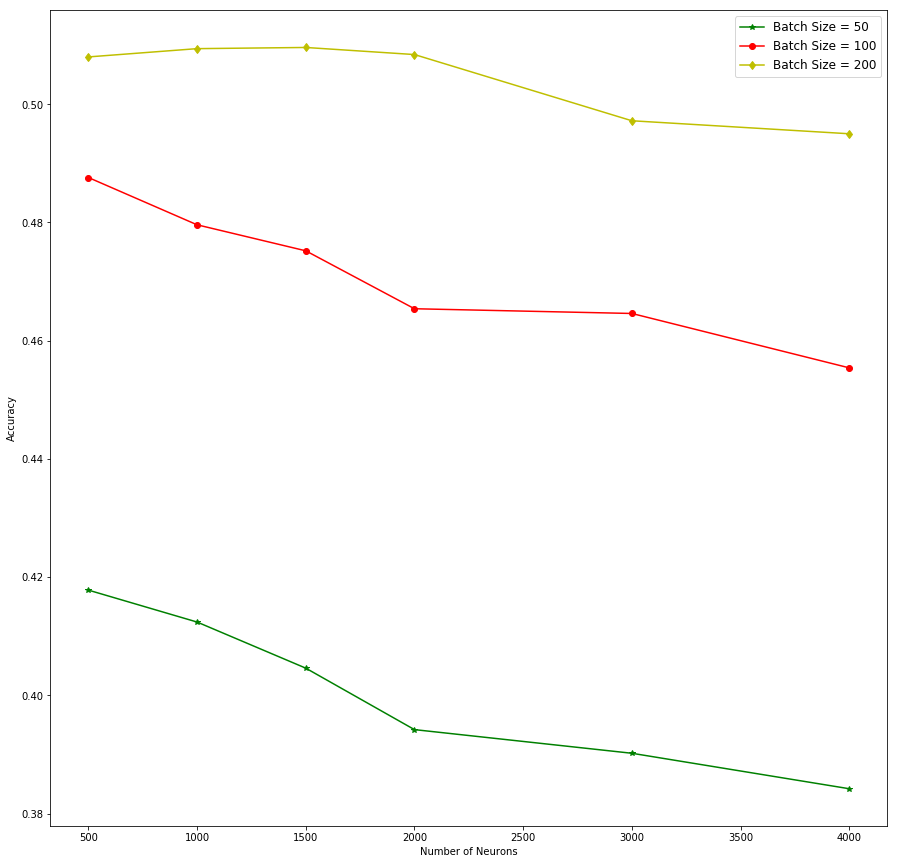

In [52]:
plt.figure(figsize = (15,15))
plt.plot(Neurons_1ep_1hiddenlayer_relu_50BS, accuracy_1ep_1hiddenlayer_relu, 'g*-', label = "Batch Size = 50")
plt.plot(Neurons_1ep_1hiddenlayer_relu_100BS, accuracy_1ep_1hiddenlayer_relu_100BS, 'ro-', label = "Batch Size = 100")
plt.plot(Neurons_1ep_1hiddenlayer_relu_200BS, accuracy_1ep_1hiddenlayer_relu_200BS, 'yd-', label = "Batch Size = 200")

plt.xlabel('Number of Neurons')
plt.ylabel('Accuracy')
plt.legend( fontsize=12)
#plt.xlim(0, 1000)

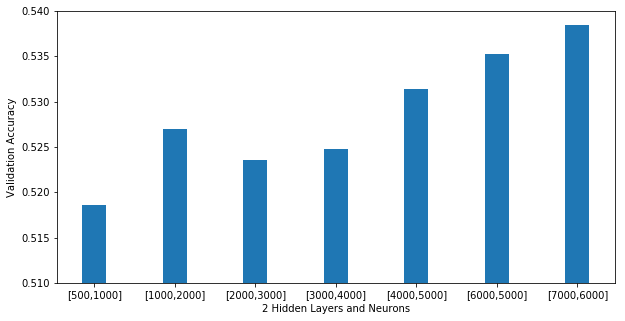

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline
Order = [1, 2, 3, 4, 5, 6, 7]
Values = [0.5186, 0.527, 0.5236, 0.5248, 0.5314, 0.5352, 0.5384]

LABELS = ["[500,1000]", "[1000,2000]","[2000,3000]", "[3000,4000]", "[4000,5000]", "[6000,5000]", "[7000,6000]"]
plt.figure(figsize = (10,5))
plt.bar(Order, Values, align='center', width=0.3)
plt.xticks(Order, LABELS)
plt.xlabel('2 Hidden Layers and Neurons')
plt.ylabel('Validation Accuracy')
plt.ylim(0.51, 0.54)
plt.show()

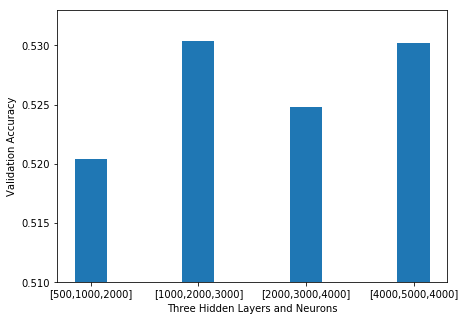

In [54]:
%matplotlib inline
Order = [1, 2, 3, 4]
Values = [0.5204, 0.5304, 0.5248, 0.5302]

LABELS = ["[500,1000,2000]", "[1000,2000,3000]", "[2000,3000,4000]","[4000,5000,4000]"]
plt.figure(figsize = (7,5))
plt.bar(Order, Values, align='center', width=0.3)
plt.xticks(Order, LABELS)
plt.xlabel('Three Hidden Layers and Neurons')
plt.ylabel('Validation Accuracy')
plt.ylim(0.51, 0.533)
plt.show()

# Changing no. of hidden layers while fixing batch size -> 200, activation function -> relu

In [213]:
Neurons_3layers_batchsize200_relu = [[500,1000,2000], [1000,2000,3000], [2000,3000,4000],[4000,5000,4000]]
Neurons_3layers_batchsize200_relu

[[500, 1000, 2000], [1000, 2000, 3000], [2000, 3000, 4000], [4000, 5000, 4000]]

In [214]:
accuracy_3layers_batchsize200_relu =[0.5204, 0.5304, 0.5248, 0.5302]
accuracy_3layers_batchsize200_relu

[0.5204, 0.5304, 0.5248, 0.5302]

# FIXING 2 hidden layers -> [7000,6000], activation function -> relu, batch size -> 200, 1 EPOCH

In [215]:
#learning curve

Train_size_list_1ep = []
Train_error_list_1ep = []
Val_error_list_1ep = []
Train_time_list_1ep = []
Val_time_list_1ep = []

config = tf.contrib.learn.RunConfig(tf_random_seed=42) 
feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train_s)
    
dnn_1_clf = tf.contrib.learn.DNNClassifier(activation_fn=tf.nn.relu, hidden_units=[7000,6000], n_classes=10, feature_columns=feature_columns, config=config)
dnn_1_clf = tf.contrib.learn.SKCompat(dnn_1_clf) #### to be compatible with sklearn
    

from datetime import datetime
start=datetime.now()
dnn_1_clf.fit(X_train_s, y_train, batch_size=200, steps=(1100))
Train_elapse = (datetime.now()-start).total_seconds()
print('dnn_1_clf training time', Train_elapse)
Train_time_list_1ep.append(Train_elapse)
    
y_train_pred = dnn_1_clf.predict(X_train_s) #return dictionary
Train_error = 1 - accuracy_score(y_train, y_train_pred['classes'])

    
print(type(y_train_pred))

start=datetime.now()
y_val_pred =  dnn_1_clf.predict(X_val_s)
    
Val_elapse = (datetime.now()-start).total_seconds()

Val_time_list_1ep.append(Val_elapse)
Val_error = 1 - accuracy_score(y_val, y_val_pred['classes'])
      
    
print('Train error, Val_error',  Train_error, '/', Val_error)
                                   
Train_error_list_1ep.append(Train_error)
Val_error_list_1ep.append(Val_error)
    
print("Train_size: ", Train_size_list_1ep)
print("Train_error: ", Train_error_list_1ep)
print("Val_error: ", Val_error_list_1ep)
print("Train_time: ", Train_time_list_1ep)
print("Val_time: ", Val_time_list_1ep)  

accuracy = accuracy_score(y_val, y_val_pred['classes'])
accuracy

INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002008C310860>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\parva\\AppData\\Local\\Temp\\tmpd83n0qe0'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\parva\AppDa

0.5384

# FIXING 2 hidden layers -> [7000,6000], activation function -> relu, batch size -> 200, 5 EPOCH

In [221]:
#learning curve

Train_size_list_5epfix = []
Train_error_list_5epfix = []
Val_error_list_5epfix = []
Train_time_list_5epfix = []
Val_time_list_5epfix = []

config = tf.contrib.learn.RunConfig(tf_random_seed=42) 
feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train_s)
    
dnn_1_clf = tf.contrib.learn.DNNClassifier(activation_fn=tf.nn.relu, hidden_units=[7000,6000], n_classes=10, feature_columns=feature_columns, config=config)
dnn_1_clf = tf.contrib.learn.SKCompat(dnn_1_clf) #### to be compatible with sklearn
    

from datetime import datetime
start=datetime.now()
dnn_1_clf.fit(X_train_s, y_train, batch_size=200, steps=(5*1100))
Train_elapse = (datetime.now()-start).total_seconds()
print('dnn_1_clf training time', Train_elapse)
Train_time_list_1ep.append(Train_elapse)
    
y_train_pred = dnn_1_clf.predict(X_train_s) #return dictionary
Train_error = 1 - accuracy_score(y_train, y_train_pred['classes'])

    
print(type(y_train_pred))

start=datetime.now()
y_val_pred =  dnn_1_clf.predict(X_val_s)
    
Val_elapse = (datetime.now()-start).total_seconds()

Val_time_list_1ep.append(Val_elapse)
Val_error = 1 - accuracy_score(y_val, y_val_pred['classes'])
      
    
print('Train error, Val_error',  Train_error, '/', Val_error)
                                   
Train_error_list_5epfix.append(Train_error)
Val_error_list_5epfix.append(Val_error)
    
print("Train_size: ", Train_size_list_5epfix)
print("Train_error: ", Train_error_list_5epfix)
print("Val_error: ", Val_error_list_5epfix)
print("Train_time: ", Train_time_list_5epfix)
print("Val_time: ", Val_time_list_5epfix)  

accuracy = accuracy_score(y_val, y_val_pred['classes'])
accuracy

INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002009D00AC50>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\parva\\AppData\\Local\\Temp\\tmp9zddsgck'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\parva\AppDa

INFO:tensorflow:loss = 0.0034550123, step = 5301 (137.467 sec)
INFO:tensorflow:Saving checkpoints for 5356 into C:\Users\parva\AppData\Local\Temp\tmp9zddsgck\model.ckpt.
INFO:tensorflow:global_step/sec: 0.73204
INFO:tensorflow:loss = 0.0025544625, step = 5401 (136.596 sec)
INFO:tensorflow:Saving checkpoints for 5500 into C:\Users\parva\AppData\Local\Temp\tmp9zddsgck\model.ckpt.
INFO:tensorflow:Loss for final step: 0.0030196535.
dnn_1_clf training time 26579.722738
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\parva\AppData\Local\Temp\tmp9zddsgck\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
<class 'dict'>
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\parva\AppData\Local\Temp\tmp9zddsgck\model.ckpt-5500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, Val_error 0.0 / 0.4132
Train_size:  []
Train_error:  [0

0.5868

# FIXING 2 hidden layers -> [7000,6000], activation function -> relu, batch size -> 200, 10 EPOCHs

In [222]:

Train_size_list_10epfix = []
Train_error_list_10epfix = []
Val_error_list_10epfix = []
Train_time_list_10epfix = []
Val_time_list_10epfix = []

config = tf.contrib.learn.RunConfig(tf_random_seed=42) 
feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train_s)
    
dnn_1_clf = tf.contrib.learn.DNNClassifier(activation_fn=tf.nn.relu, hidden_units=[7000,6000], n_classes=10, feature_columns=feature_columns, config=config)
dnn_1_clf = tf.contrib.learn.SKCompat(dnn_1_clf) #### to be compatible with sklearn
    
from datetime import datetime
start=datetime.now()
dnn_1_clf.fit(X_train_s, y_train, batch_size=200, steps=(10*1100))
Train_elapse = (datetime.now()-start).total_seconds()
print('dnn_1_clf training time', Train_elapse)
Train_time_list_1ep.append(Train_elapse)
    
y_train_pred = dnn_1_clf.predict(X_train_s) #return dictionary
Train_error = 1 - accuracy_score(y_train, y_train_pred['classes'])

    
print(type(y_train_pred))

start=datetime.now()
y_val_pred =  dnn_1_clf.predict(X_val_s)
    
Val_elapse = (datetime.now()-start).total_seconds()

Val_time_list_1ep.append(Val_elapse)
Val_error = 1 - accuracy_score(y_val, y_val_pred['classes'])
      
    
print('Train error, Val_error',  Train_error, '/', Val_error)
                                   
Train_error_list_10epfix.append(Train_error)
Val_error_list_10epfix.append(Val_error)
    
print("Train_size: ", Train_size_list_10epfix)
print("Train_error: ", Train_error_list_10epfix)
print("Val_error: ", Val_error_list_10epfix)
print("Train_time: ", Train_time_list_10epfix)
print("Val_time: ", Val_time_list_10epfix)  

accuracy = accuracy_score(y_val, y_val_pred['classes'])
accuracy

INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002009D00A5C0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\parva\\AppData\\Local\\Temp\\tmp_2ed3nll'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\parva\AppDa

INFO:tensorflow:global_step/sec: 0.56328
INFO:tensorflow:loss = 0.004237018, step = 5601 (177.501 sec)
INFO:tensorflow:Saving checkpoints for 5652 into C:\Users\parva\AppData\Local\Temp\tmp_2ed3nll\model.ckpt.
INFO:tensorflow:global_step/sec: 0.545386
INFO:tensorflow:loss = 0.0029024542, step = 5701 (183.424 sec)
INFO:tensorflow:global_step/sec: 0.56704
INFO:tensorflow:loss = 0.0034669023, step = 5801 (176.341 sec)
INFO:tensorflow:global_step/sec: 0.565069
INFO:tensorflow:loss = 0.0026942408, step = 5901 (177.032 sec)
INFO:tensorflow:Saving checkpoints for 5988 into C:\Users\parva\AppData\Local\Temp\tmp_2ed3nll\model.ckpt.
INFO:tensorflow:global_step/sec: 0.54321
INFO:tensorflow:loss = 0.0031394714, step = 6001 (183.916 sec)
INFO:tensorflow:global_step/sec: 0.618205
INFO:tensorflow:loss = 0.0028794957, step = 6101 (161.988 sec)
INFO:tensorflow:global_step/sec: 0.588751
INFO:tensorflow:loss = 0.003419556, step = 6201 (169.686 sec)
INFO:tensorflow:global_step/sec: 0.587612
INFO:tensorflo

0.5886

In [226]:
Accuracy_increase_with_epochs = [0.5384, 0.5868, 0.5886]
Accuracy_increase_with_epochs

[0.5384, 0.5868, 0.5886]

In [228]:
epochs = [1, 5, 10]
epochs

[1, 5, 10]

In [ ]:
plt.figure(figsize = (5,5))
plt.plot(epochs, accuracy_increase_with_epochs, 'm*-')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend( fontsize=15)
#plt.xlim(0, 1000)
